In [2]:
from hmf import MassFunction, cosmology    # The main hmf class
import matplotlib.pyplot as plt  # The necessary plotting library
import numpy as np               # Numerical array library
from scipy import integrate

# This just serves to render plots inline in the notebook. Do not use in a script.
%matplotlib inline

In [3]:
import matplotlib
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['axes.labelsize'] = 20

In [4]:
from hmf.mass_function import *

In [5]:
import os, pickle 

# with open('saved_dictionary.pkl', 'wb') as f:
#     pickle.dump(dictionary, f)
        
# with open('saved_dictionary.pkl', 'rb') as f:
#     loaded_dict = pickle.load(f)

In [1]:
from itertools import cycle
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

In [6]:
MassFunction.get_all_parameter_defaults(recursive=False)

{'cosmo_model': FlatLambdaCDM(name='Planck18', H0=<Quantity 67.66 km / (Mpc s)>, Om0=0.30966, Tcmb0=<Quantity 2.7255 K>, Neff=3.046, m_nu=<Quantity [0.  , 0.  , 0.06] eV>, Ob0=0.04897),
 'cosmo_params': {},
 'n': 0.96670000000000000373,
 'sigma_8': 0.8158999999999999586,
 'growth_params': {},
 'lnk_min': -18.420680743952367209,
 'lnk_max': 9.903487552536127225,
 'dlnk': 0.050000000000000002776,
 'z': 0.0,
 'transfer_model': hmf.density_field.transfer_models.CAMB,
 'transfer_params': {},
 'takahashi': True,
 'growth_model': hmf.cosmology.growth_factor.GrowthFactor,
 'hmf_model': hmf.mass_function.fitting_functions.Tinker08,
 'Mmin': 10.0,
 'Mmax': 15.0,
 'dlog10m': 0.010000000000000000208,
 'mdef_model': None,
 'mdef_params': {},
 'delta_c': 1.6859999999999999432,
 'hmf_params': {},
 'filter_model': hmf.density_field.filters.TopHat,
 'filter_params': {},
 'disable_mass_conversion': True}

In [47]:
FittingFunction.get_models().keys()

dict_keys(['PS', 'SMT', 'ST', 'Jenkins', 'Warren', 'Reed03', 'Reed07', 'Peacock', 'Angulo', 'AnguloBound', 'Watson_FoF', 'Watson', 'Crocce', 'Courtin', 'Bhattacharya', 'Tinker08', 'Tinker10', 'Behroozi', 'Pillepich', 'Manera', 'Ishiyama', 'Bocquet200mDMOnly', 'Bocquet200mHydro', 'Bocquet200cDMOnly', 'Bocquet200cHydro', 'Bocquet500cDMOnly', 'Bocquet500cHydro'])

In [30]:
fitting_functions.AnguloBound.get_measured_mdef().__dir__()

['params',
 '__module__',
 '__doc__',
 '_defaults',
 'halo_density',
 'colossus_name',
 '__str__',
 'critical_density',
 'mean_density',
 'halo_overdensity_mean',
 'halo_overdensity_crit',
 'm_to_r',
 'r_to_m',
 '_duffy_concentration',
 'change_definition',
 '__eq__',
 '__hash__',
 '_plugins',
 '__init_subclass__',
 '__init__',
 'get_models',
 '__dict__',
 '__weakref__',
 '__repr__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__new__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [69]:
fitting_functions.Jenkins.get_measured_mdef().colossus_name,fitting_functions.Jenkins.get_measured_mdef().params

('fof', {'linking_length': 0.2})

In [42]:
fitting_functions.Tinker08.get_measured_mdef().colossus_name,fitting_functions.Tinker08.get_measured_mdef().params

(None, {})

In [345]:
#integration function
def cal_integ_mass(mft, minm=-8,maxm=17):
    logm=np.arange(minm,maxm, 0.2)
    ttm=np.copy(logm)
    for i in range(logm.size):
        # mft=MassFunction(Mmin=logm[i],Mmax=35,z=0,hmf_model='Angulo')
        mft.Mmin=logm[i]
        ttm[i]=integrate.simpson(mft.dndm*mft.m,mft.m) 
    return 10**logm, ttm, 10**((logm[1:]+logm[:-1])/2), ttm[:-1]-ttm[1:]

In [6]:
def cal_integ_mass(mft):
    ttm = integrate.cumulative_simpson(mft.dndm*mft.m*mft.m, x=np.log(mft.m))
    # xx=(mft.m[:-1]+mft.m[1:])/2
    dtm = ttm[1:] - ttm[:-1]
    ttm = np.cumsum(dtm[::-1])[::-1]
    xxx = mft.m[1:-1]  #(mft.m[:-1]+mft.m[1:])/2
    return xxx, ttm, xxx, dtm/mft.dlog10m

In [18]:
allff=[(name, cls) for name, cls in fitting_functions.__dict__.items() if isinstance(cls, type)]

In [19]:
allff

[('_spline', scipy.interpolate._fitpack2.InterpolatedUnivariateSpline),
 ('Mydouble', numpy.longdouble),
 ('SimDetails', hmf.mass_function.fitting_functions.SimDetails),
 ('FittingFunction', hmf.mass_function.fitting_functions.FittingFunction),
 ('PS', hmf.mass_function.fitting_functions.PS),
 ('SMT', hmf.mass_function.fitting_functions.SMT),
 ('ST', hmf.mass_function.fitting_functions.ST),
 ('Jenkins', hmf.mass_function.fitting_functions.Jenkins),
 ('Warren', hmf.mass_function.fitting_functions.Warren),
 ('Reed03', hmf.mass_function.fitting_functions.Reed03),
 ('Reed07', hmf.mass_function.fitting_functions.Reed07),
 ('Peacock', hmf.mass_function.fitting_functions.Peacock),
 ('Angulo', hmf.mass_function.fitting_functions.Angulo),
 ('AnguloBound', hmf.mass_function.fitting_functions.AnguloBound),
 ('Watson_FoF', hmf.mass_function.fitting_functions.Watson_FoF),
 ('Watson', hmf.mass_function.fitting_functions.Watson),
 ('Crocce', hmf.mass_function.fitting_functions.Crocce),
 ('Courtin', h

In [47]:
for name, cls in allff:
    if isinstance(cls, type) and name not in ['_spline','SimDetails','FittingFunction','Mydouble']:
        if cls.get_measured_mdef() is None:
            print(name)

PS


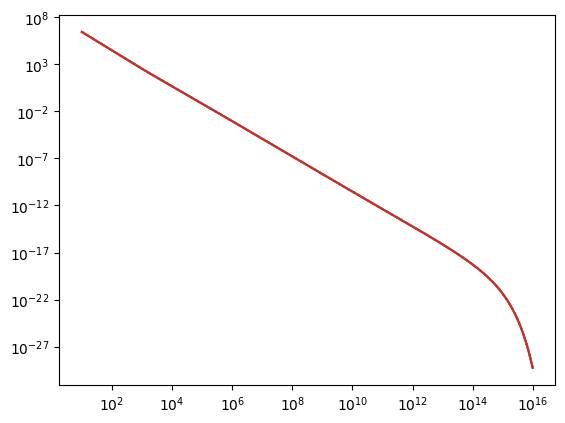

In [108]:
mf_ps=MassFunction(Mmin=-8,Mmax=17,z=0,hmf_model="PS",   transfer_model='CAMB',  transfer_params={"kmax": 1000, "extrapolate_with_eh": True})
mf_ps.disable_mass_conversion=False
mf_ps.update( mdef_model  = "FOF", mdef_params = {"linking_length": 0.2})
plt.loglog(mf_ps.m,mf_ps.dndm, label='PS - FOF')
mf_ps.update( mdef_model  = "SOVirial", mdef_params = {})
plt.loglog(mf_ps.m,mf_ps.dndm, ls='--', label='PS - VIR')
mf_ps.update( mdef_model  = "SOCritical", mdef_params = {"overdensity": 200})
plt.loglog(mf_ps.m,mf_ps.dndm, ls=':', label='PS - SO200c')
mf_ps.update( mdef_model  = "SOCritical", mdef_params = {"overdensity": 500})
plt.loglog(mf_ps.m,mf_ps.dndm, ls='-', label='PS - SO500c')

In [ ]:
cosmology.cosmo.Planck15.critical_density0, cosmology.cosmo.Planck15.mean

In [308]:
ad_def['cosmo']=mf_so.cosmo_model

In [309]:
ad_def['cosmo'].critical_density0.to('Msun/Mpc^3')/ad_def['cosmo'].h**2*ad_def['cosmo'].hp0

<Quantity 8.53425129e+10 solMass / Mpc3>

In [304]:
MassFunction.parameter_info(["mean_density0"]) 

In [7]:
import astropy.units as u
def cal_mean_dens(cosmo):
    """
    Mean density of universe at z=0, [Msun h^2 / Mpc**3]
    """
    return  (cosmo.Om0 * cosmo.critical_density0 / cosmo.h ** 2).to(u.Msun / u.Mpc ** 3).value


In [321]:
cal_mean_dens(ad_def['cosmo'])

85342512878.09296

# Defaul model comparison Cosmo: Planck15
# Transfer Function: EH_BAO

'CAMB' seems to have a weird bump at M~4, not sure how this is caused.

In [20]:
# gather the data in a dictionary
if os.path.isfile('ad_def.ny'):
    ad_def=np.load('ad_def.npy',allow_pickle=True).item()
else:
    ad_def={}
    ad_def['HMF']={}; ad_def['IMF']={}; ad_def['DMF']={}; ad_def['HMFlog']={}; 
    for i in ad_def.keys():
        ad_def[i]['FOF']={}; ad_def[i]['SOvir']={}; ad_def[i]['SO200c']={};ad_def[i]['SO500c']={};
    
    mf_fof=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="Jenkins", lnk_min=-30, lnk_max=100, transfer_model='EH_BAO', cosmo_model=cosmology.cosmo.Planck15)
                        # transfer_model='CAMB',  transfer_params={"kmax": 500, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15)
    mf_vir=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="ST", lnk_min=-30, lnk_max=100, transfer_model='EH_BAO', cosmo_model=cosmology.cosmo.Planck15)
                        # transfer_model='CAMB',  transfer_params={"kmax": 500, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15)
    mf_so=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="Watson", mdef_model  = "SOCritical", mdef_params = {"overdensity": 500}, lnk_min=-30, lnk_max=100,
                       transfer_model='EH_BAO', cosmo_model=cosmology.cosmo.Planck15)
                       # transfer_model='CAMB',  transfer_params={"kmax": 500, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15)
    ad_def['cosmo']=mf_so.cosmo_model
    for name, cls in allff:
        if isinstance(cls, type) and name not in ['_spline','SimDetails','FittingFunction','Mydouble']:
            if cls.get_measured_mdef() is None:
                print('None:', name)
                mf_ps=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="PS", lnk_min=-30, lnk_max=100, transfer_model='EH_BAO', cosmo_model=cosmology.cosmo.Planck15)
                                   # transfer_model='CAMB',  transfer_params={"kmax": 500, "extrapolate_with_eh": True})
                ad_def['HMF']['PS'] = mf_ps.dndm
                ad_def['HMFlog']['PS'] = mf_ps.dndlog10m
                ad_def['HMF']['X'] = ad_def['HMFlog']['X'] = mf_ps.m
                
                xi,mi,xf,mf=cal_integ_mass(mf_ps)
                ad_def['IMF']['PS'] = mi
                ad_def['IMF']['X'] = xi
                ad_def['DMF']['PS'] = mf
                ad_def['DMF']['X'] = xf
                
            else:            
                # print(name, cls.get_measured_mdef().colossus_name)
                if cls.get_measured_mdef().colossus_name == 'fof':
                    mf_fof.update( hmf_model  = name, mdef_params = {"linking_length": 0.2})
                    ad_def['HMF']['FOF'][name] = mf_fof.dndm
                    ad_def['HMFlog']['FOF'][name] = mf_fof.dndlog10m
                    if not np.array_equal(ad_def['HMF']['X'], mf_fof.m):
                        print('the axis is not same between HMF/X and FOF/'+name, ad_def['HMF']['X'], mf_fof.m)
                        
                    xi,mi,xf,mf=cal_integ_mass(mf_fof)
                    ad_def['IMF']['FOF'][name] = mi
                    if not np.array_equal(ad_def['IMF']['X'], xi):
                        print('the axis is not same between IMF/X and FOF/'+name)
                    ad_def['DMF']['FOF'][name] = mf
                    if not np.array_equal(ad_def['DMF']['X'], xf):
                        print('the axis is not same between DMF/X and FOF/'+name)
                elif cls.get_measured_mdef().colossus_name == 'vir':
                    mf_vir.update( hmf_model  = name, mdef_params = {})
                    # print('VIR: name: ', name, ' x: ',mf_vir.m)
                    ad_def['HMF']['SOvir'][name] = mf_vir.dndm
                    ad_def['HMFlog']['SOvir'][name] = mf_vir.dndlog10m
                    if not np.array_equal(ad_def['HMF']['X'], mf_vir.m):
                        print('the axis is not same between HMF/X and SOvir/'+name, ad_def['HMF']['X'], mf_vir.m)
                        
                    xi,mi,xf,mf=cal_integ_mass(mf_vir)
                    ad_def['IMF']['SOvir'][name] = mi
                    if not np.array_equal(ad_def['IMF']['X'], xi):
                        print('the axis is not same between IMF/X and SOvir/'+name)
                    ad_def['DMF']['SOvir'][name] = mf
                    if not np.array_equal(ad_def['DMF']['X'], xf):
                        print('the axis is not same between DMF/X and SOvir/'+name)
    
                elif cls.get_measured_mdef().colossus_name is None:
                    mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 200})
                    ad_def['HMF']['SO200c'][name] = mf_so.dndm
                    ad_def['HMFlog']['SO200c'][name] = mf_so.dndlog10m
                    if not np.array_equal(ad_def['HMF']['X'], mf_so.m):
                        print('the axis is not same between HMF/X and SO200c/'+name, ad_def['HMF']['X'], mf_so.m)
                        
                    xi,mi,xf,mf=cal_integ_mass(mf_so)
                    ad_def['IMF']['SO200c'][name] = mi
                    if not np.array_equal(ad_def['IMF']['X'], xi):
                        print('the axis is not same between IMF/X and SO200c/'+name)
                    ad_def['DMF']['SO200c'][name] = mf
                    if not np.array_equal(ad_def['DMF']['X'], xf):
                        print('the axis is not same between DMF/X and SO200c/'+name)
                        
                    mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 500})
                    ad_def['HMF']['SO500c'][name] = mf_so.dndm
                    ad_def['HMFlog']['SO500c'][name] = mf_so.dndlog10m
                    if not np.array_equal(ad_def['HMF']['X'], mf_so.m):
                        print('the axis is not same between HMF/X and SO500c/'+name, ad_def['HMF']['X'], mf_so.m)
                        
                    xi,mi,xf,mf=cal_integ_mass(mf_so)
                    ad_def['IMF']['SO500c'][name] = mi
                    if not np.array_equal(ad_def['IMF']['X'], xi):
                        print('the axis is not same between IMF/X and SO500c/'+name)
                    ad_def['DMF']['SO500c'][name] = mf
                    if not np.array_equal(ad_def['DMF']['X'], xf):
                        print('the axis is not same between DMF/X and SO500c/'+name)
                else:
                    if '200m' in name:
                        continue
    
                    if '200c' in name:
                        mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 200})
                        ad_def['HMF']['SO200c'][name] = mf_so.dndm
                        ad_def['HMFlog']['SO200c'][name] = mf_so.dndlog10m
                        if not np.array_equal(ad_def['HMF']['X'], mf_so.m):
                            print('the axis is not same between HMF/X and SO200c/'+name, ad_def['HMF']['X'], mf_so.m)
                            
                        xi,mi,xf,mf=cal_integ_mass(mf_so)
                        ad_def['IMF']['SO200c'][name] = mi
                        if not np.array_equal(ad_def['IMF']['X'], xi):
                            print('the axis is not same between IMF/X and SO200c/'+name)
                        ad_def['DMF']['SO200c'][name] = mf
                        if not np.array_equal(ad_def['DMF']['X'], xf):
                            print('the axis is not same between DMF/X and SO200c/'+name)
                    else:
                        mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 500})
                        ad_def['HMF']['SO500c'][name] = mf_so.dndm
                        ad_def['HMFlog']['SO500c'][name] = mf_so.dndlog10m
                        if not np.array_equal(ad_def['HMF']['X'], mf_so.m):
                            print('the axis is not same between HMF/X and SO500c/'+name, ad_def['HMF']['X'], mf_so.m)
                            
                        xi,mi,xf,mf=cal_integ_mass(mf_so)
                        ad_def['IMF']['SO500c'][name] = mi
                        if not np.array_equal(ad_def['IMF']['X'], xi):
                            print('the axis is not same between IMF/X and SO500c/'+name)
                        ad_def['DMF']['SO500c'][name] = mf
                        if not np.array_equal(ad_def['DMF']['X'], xf):
                            print('the axis is not same between DMF/X and SO500c/'+name)
    np.save('ad_def',ad_def)

None: PS


In [17]:
ad_def['HMFlog']['SO200c'].keys()

dict_keys(['Watson', 'Tinker08', 'Tinker10', 'Bocquet200cDMOnly', 'Bocquet200cHydro', 'Bocquet500cDMOnly', 'Bocquet500cHydro'])

In [414]:
# gather the HMF in dndlog10m data in a dictionary
if os.path.isfile('ad_def_log10m.ny'):
    ad_def_log10m=np.load('ad_def_log10m.npy',allow_pickle=True).item()
else:
    ad_def_log10m={}
    ad_def_log10m['FOF']={}; ad_def_log10m['SOvir']={}; ad_def_log10m['SO200c']={};ad_def_log10m['SO500c']={};
    
    mf_fof=MassFunction(Mmin=-8,Mmax=17,z=0,hmf_model="Jenkins",   transfer_model='CAMB',  transfer_params={"kmax": 1000, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15)
    mf_vir=MassFunction(Mmin=-8,Mmax=17,z=0,hmf_model="ST",   transfer_model='CAMB',  transfer_params={"kmax": 1000, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15)
    mf_so=MassFunction(Mmin=-8,Mmax=17,z=0,hmf_model="Watson", mdef_model  = "SOCritical", mdef_params = {"overdensity": 500},  transfer_model='CAMB',  transfer_params={"kmax": 1000, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15)

    for name, cls in fitting_functions.__dict__.items():
        if isinstance(cls, type) and name not in ['_spline','SimDetails','FittingFunction']:
            if cls.get_measured_mdef() is None:
                print('None:', name)
                mf_ps=MassFunction(Mmin=-8,Mmax=17,z=0,hmf_model="PS",   transfer_model='CAMB',  transfer_params={"kmax": 1000, "extrapolate_with_eh": True})
                ad_def_log10m['PS'] = mf_ps.dndlog10m
                ad_def_log10m['X'] = mf_ps.m
                
            else:            
                # print(name, cls.get_measured_mdef().colossus_name)
                if cls.get_measured_mdef().colossus_name == 'fof':
                    mf_fof.update( hmf_model  = name,Mmin=-8,Mmax=17, mdef_params = {"linking_length": 0.2})
                    ad_def_log10m['FOF'][name] = mf_fof.dndlog10m
                    if not np.array_equal(ad_def_log10m['X'], mf_fof.m):
                        print('the axis is not same between HMF/X and FOF/'+name, ad_def_log10m['X'], mf_fof.m)
                        
                elif cls.get_measured_mdef().colossus_name == 'vir':
                    mf_vir.update( hmf_model  = name,Mmin=-8,Mmax=17, mdef_params = {})
                    # print('VIR: name: ', name, ' x: ',mf_vir.m)
                    ad_def_log10m['SOvir'][name] = mf_vir.dndlog10m
                    if not np.array_equal(ad_def_log10m['X'], mf_vir.m):
                        print('the axis is not same between HMF/X and SOvir/'+name, ad_def_log10m['X'], mf_vir.m)
    
                elif cls.get_measured_mdef().colossus_name is None:
                    mf_so.update( hmf_model  = name, Mmin=-8,Mmax=17,mdef_params = {"overdensity": 200})
                    ad_def_log10m['SO200c'][name] = mf_so.dndlog10m
                    if not np.array_equal(ad_def_log10m['X'], mf_so.m):
                        print('the axis is not same between HMF/X and SO200c/'+name, ad_def_log10m['X'], mf_so.m)
                        
                    mf_so.update( hmf_model  = name, Mmin=-8,Mmax=17,mdef_params = {"overdensity": 500})
                    ad_def_log10m['SO500c'][name] = mf_so.dndlog10m
                    if not np.array_equal(ad_def_log10m['X'], mf_so.m):
                        print('the axis is not same between HMF/X and SO500c/'+name, ad_def_log10m['X'], mf_so.m)

                else:
                    if '200m' in name:
                        continue
    
                    if '200c' in name:
                        mf_so.update( hmf_model  = name,Mmin=-8,Mmax=17, mdef_params = {"overdensity": 200})
                        ad_def_log10m['SO200c'][name] = mf_so.dndlog10m
                        if not np.array_equal(ad_def_log10m['X'], mf_so.m):
                            print('the axis is not same between HMF/X and SO200c/'+name, ad_def_log10m['X'], mf_so.m)

                    else:
                        mf_so.update( hmf_model  = name, Mmin=-8,Mmax=17,mdef_params = {"overdensity": 500})
                        ad_def_log10m['SO500c'][name] = mf_so.dndlog10m
                        if not np.array_equal(ad_def_log10m['X'], mf_so.m):
                            print('the axis is not same between HMF/X and SO500c/'+name, ad_def_log10m['X'], mf_so.m)

    np.save('ad_def_log10m',ad_def_log10m)

None: PS


In [13]:
# simulation VVV data

data_vvv={}
for i in range(8):
    data_vvv['L'+str(i)]=np.loadtxt('./L'+str(i)+'.csv',delimiter=',')
    

In [416]:
 data_vvv['L0'][:,1]

array([2.84580537e-02, 1.79696636e-02, 1.17913514e-02, 7.54896390e-03,
       4.75093899e-03, 3.01386037e-03, 1.93860386e-03, 1.24280355e-03,
       7.89241592e-04, 4.93303621e-04, 3.04118690e-04, 1.86822638e-04,
       1.09194416e-04, 6.11607918e-05, 3.31551645e-05, 1.70244193e-05])

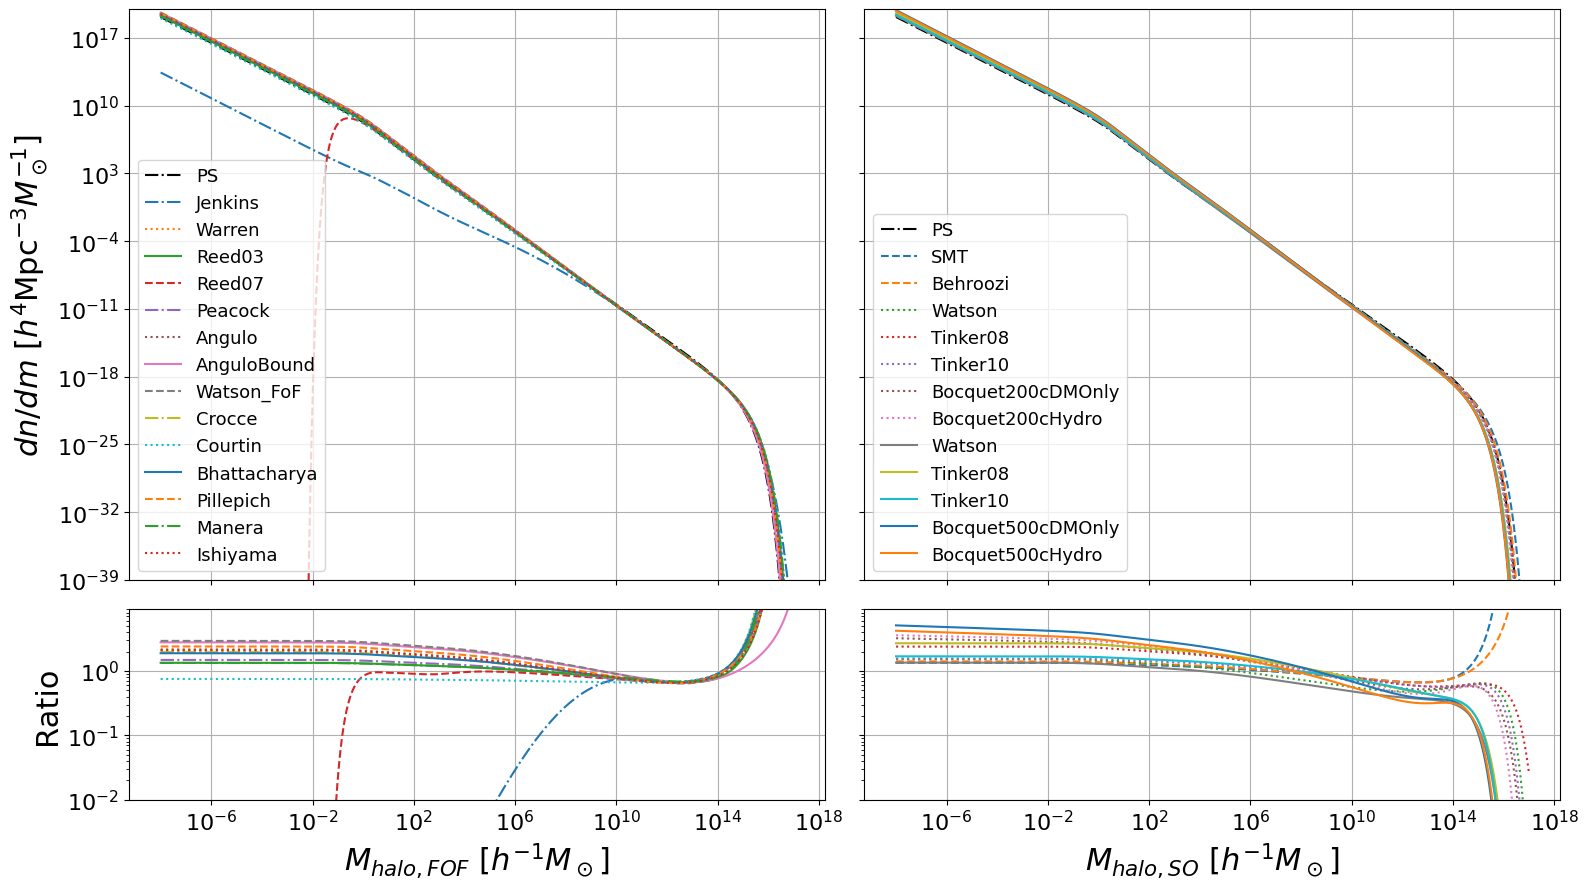

In [412]:
# only HMF
fig, axs = plt.subplots(2, 2, figsize=(16, 9),  sharey='row', sharex='col', gridspec_kw={'height_ratios': [3, 1]})
hn='HMF'
axs[0,0].loglog(ad_def[hn]['X'], ad_def[hn]['PS'],color='k',ls='-.', label='PS')
axs[0,1].loglog(ad_def[hn]['X'], ad_def[hn]['PS'],color='k',ls='-.', label='PS')

for j, fn in enumerate(ad_def[hn]['FOF'].keys()):
    p=axs[0,0].loglog(ad_def[hn]['X'], ad_def[hn]['FOF'][fn],  ls=next(linecycler), label=fn)
    axs[1,0].loglog(ad_def[hn]['X'], ad_def[hn]['FOF'][fn]/ad_def[hn]['PS'], color=p[0].get_color(), ls=p[0].get_linestyle(), label=fn)
    
for j, fn in enumerate(ad_def[hn]['SOvir'].keys()):
    if fn == 'ST': continue
    p=axs[0,1].loglog(ad_def[hn]['X'], ad_def[hn]['SOvir'][fn],  ls='--', label=fn)
    axs[1,1].loglog(ad_def[hn]['X'], ad_def[hn]['SOvir'][fn]/ad_def[hn]['PS'], color=p[0].get_color(), ls='--', label=fn)
    
for j, fn in enumerate(ad_def[hn]['SO200c'].keys()):
    p=axs[0,1].loglog(ad_def[hn]['X'], ad_def[hn]['SO200c'][fn],  ls=':', label=fn)
    axs[1,1].loglog(ad_def[hn]['X'], ad_def[hn]['SO200c'][fn]/ad_def[hn]['PS'], color=p[0].get_color(), ls=':', label=fn)
for j, fn in enumerate(ad_def[hn]['SO500c'].keys()):
    p=axs[0,1].loglog(ad_def[hn]['X'], ad_def[hn]['SO500c'][fn],  ls='-', label=fn)
    axs[1,1].loglog(ad_def[hn]['X'], ad_def[hn]['SO500c'][fn]/ad_def[hn]['PS'], color=p[0].get_color(), ls='-', label=fn)

# ax2 = axs[0,1].twinx()
# for i in range(8):
#     ax2.loglog(data_vvv['L'+str(i)][:,0], data_vvv['L'+str(i)][:,1],'-',label='VVV-L'+str(i))
# ax2.get_yaxis().set_visible(False)
# ax2.legend(loc=3)

for axx in axs.flatten():
    # axx.legend()
    axx.grid()
axs[0,0].legend(fontsize=13,ncol=1)
axs[0,1].legend(fontsize=13,ncol=1)
axs[0,0].set_ylim(1e-39,1e20)
axs[1,0].set_ylim(1e-2,9)
# ax2.grid()
axs[1,0].set_xlabel(r"$M_{halo, FOF}\ [h^{-1}M_\odot]$",fontsize=22)
axs[1,0].set_ylabel(r"Ratio",fontsize=22)
axs[0,0].set_ylabel(r"$dn/dm$ $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$",fontsize=22)
axs[1,1].set_xlabel(r"$M_{halo, SO}\ [h^{-1}M_\odot]$",fontsize=22)

fig.tight_layout()
fig.savefig('hmf.pdf',dpi=300)

Watson
Tinker08
Tinker10
Bocquet200cDMOnly
Bocquet200cHydro


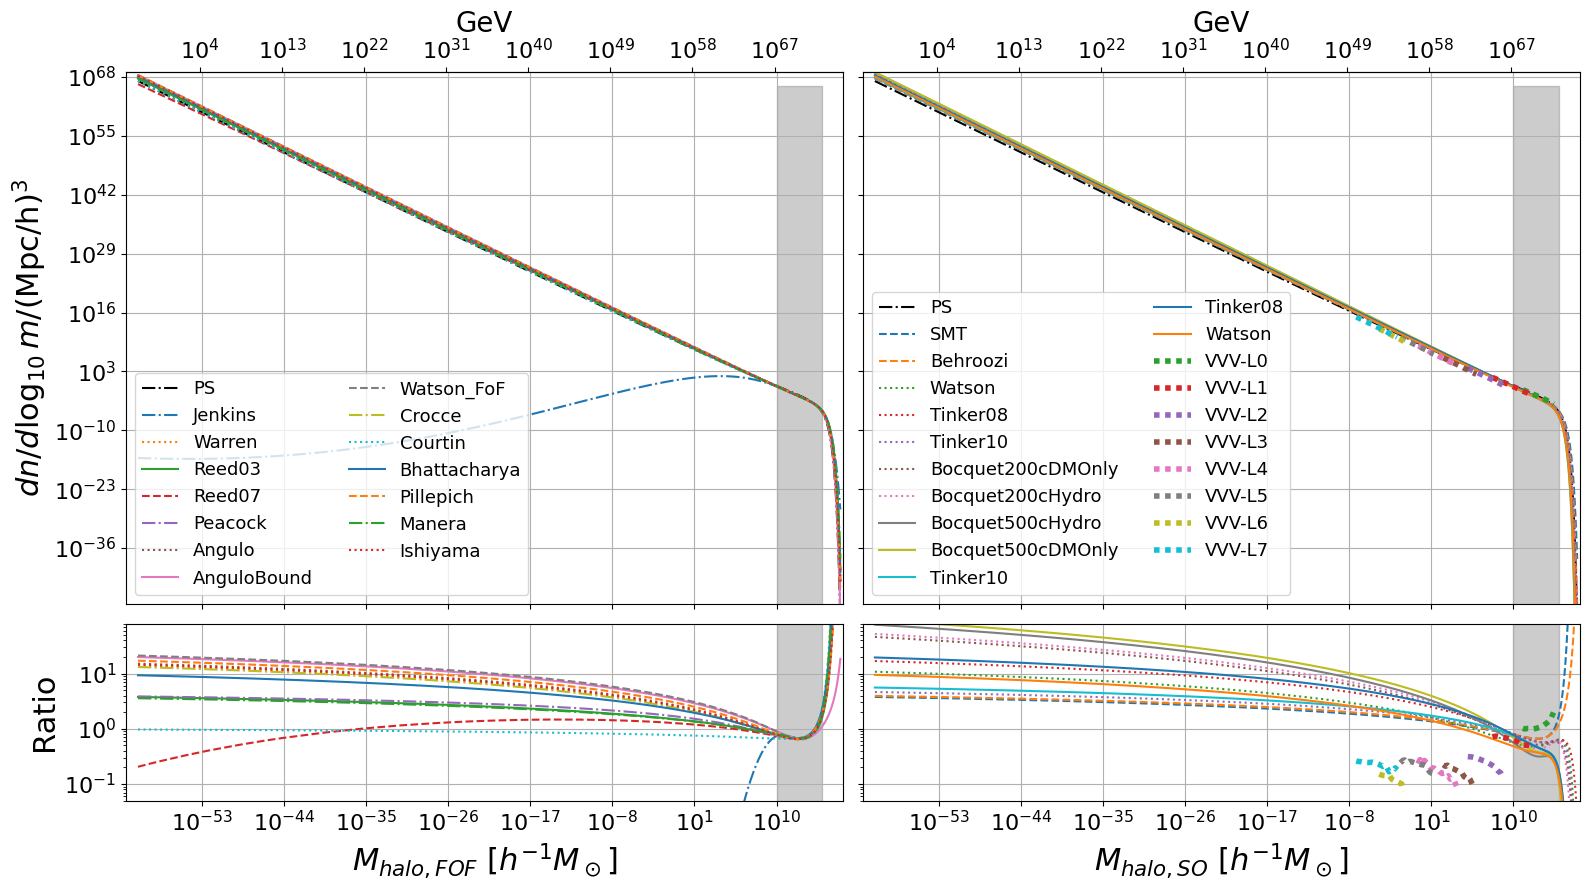

In [26]:
# only HMF in dndlog10m
fig, axs = plt.subplots(2, 2, figsize=(16, 9),  sharey='row', sharex='col', gridspec_kw={'height_ratios': [3, 1]})
hn='HMFlog'
axs[0,0].loglog(ad_def[hn]['X'], ad_def[hn]['PS'],color='k',ls='-.', label='PS')
axs[0,1].loglog(ad_def[hn]['X'], ad_def[hn]['PS'],color='k',ls='-.', label='PS')

for j, fn in enumerate(ad_def[hn]['FOF'].keys()):
    p=axs[0,0].loglog(ad_def[hn]['X'], ad_def[hn]['FOF'][fn],  ls=next(linecycler), label=fn)
    axs[1,0].loglog(ad_def[hn]['X'], ad_def[hn]['FOF'][fn]/ad_def[hn]['PS'], color=p[0].get_color(), ls=p[0].get_linestyle(), label=fn)
    
for j, fn in enumerate(ad_def[hn]['SOvir'].keys()):
    if fn == 'ST': continue
    p=axs[0,1].loglog(ad_def[hn]['X'], ad_def[hn]['SOvir'][fn],  ls='--', label=fn)
    axs[1,1].loglog(ad_def[hn]['X'], ad_def[hn]['SOvir'][fn]/ad_def[hn]['PS'], color=p[0].get_color(), ls='--', label=fn)
    
for j, fn in enumerate(ad_def[hn]['SO200c'].keys()):
    print(fn)
    p=axs[0,1].loglog(ad_def[hn]['X'], ad_def[hn]['SO200c'][fn],  ls=':', label=fn)
    axs[1,1].loglog(ad_def[hn]['X'], ad_def[hn]['SO200c'][fn]/ad_def[hn]['PS'], color=p[0].get_color(), ls=':', label=fn)
for j, fn in reversed(list(enumerate(ad_def[hn]['SO500c'].keys()))):
    p=axs[0,1].loglog(ad_def[hn]['X'], ad_def[hn]['SO500c'][fn],  ls='-', label=fn)
    axs[1,1].loglog(ad_def[hn]['X'], ad_def[hn]['SO500c'][fn]/ad_def[hn]['PS'], color=p[0].get_color(), ls='-', label=fn)

# ax2 = axs[0,1].twinx()
for i in range(8):
    p=axs[0,1].loglog(data_vvv['L'+str(i)][:,0], data_vvv['L'+str(i)][:,1]/0.6777**3, ls=(0, (1, 1)), lw=4, label='VVV-L'+str(i))
    newy=np.interp(data_vvv['L'+str(i)][:,0], np.float64(ad_def[hn]['X']), np.float64(ad_def[hn]['PS']))
    axs[1,1].loglog(data_vvv['L'+str(i)][:,0], data_vvv['L'+str(i)][:,1]/0.6777**3/newy, ls=(0, (1, 1)), lw=4, color=p[0].get_color())
# ax2.get_yaxis().set_visible(False)
# ax2.legend(loc=3)

#twin axis# Define function and its inverse
f = lambda x: x/1.6462e57   #units from Msun/h to Gev
g = lambda x: 1.6462e57*x
ax2 = axs[0,0].secondary_xaxis("top", functions=(g,f))
ax2.set_xlabel("GeV")
ax3 = axs[0,1].secondary_xaxis("top", functions=(g,f))
ax3.set_xlabel("GeV")

for axx in axs.flatten():
    # axx.legend()
    axx.grid()
    axx.fill_betweenx([1e-50,1e66],1e10,x2=1e15, color='0.5', alpha=0.4)
axs[0,0].legend(fontsize=13,ncol=2)
axs[0,1].legend(fontsize=13,ncol=2)
axs[0,0].set_ylim(5e-49,1e69)
axs[0,0].set_xlim(5e-62,2e17)
axs[0,1].set_xlim(5e-62,2e17)
axs[1,0].set_ylim(5e-2,80)
# ax2.grid()
axs[1,0].set_xlabel(r"$M_{halo, FOF}\ [h^{-1}M_\odot]$",fontsize=22)
axs[1,0].set_ylabel(r"Ratio",fontsize=22)
axs[0,0].set_ylabel(r"$dn/d\log_{10}m / ({\rm Mpc/h})^{3} $",fontsize=22)
axs[1,1].set_xlabel(r"$M_{halo, SO}\ [h^{-1}M_\odot]$",fontsize=22)

fig.tight_layout()
fig.savefig('hmf_dlog10m.pdf',dpi=300)

/tmp/ipykernel_249526/3174270732.py:12: RuntimeWarning: divide by zero encountered in divide
  axs[i*2+1,0].loglog(ad_def[hn]['X'], ad_def[hn]['FOF'][fn]/ad_def[hn]['PS'], color=p[0].get_color(), ls=p[0].get_linestyle(), label=fn)
/tmp/ipykernel_249526/3174270732.py:12: RuntimeWarning: invalid value encountered in divide
  axs[i*2+1,0].loglog(ad_def[hn]['X'], ad_def[hn]['FOF'][fn]/ad_def[hn]['PS'], color=p[0].get_color(), ls=p[0].get_linestyle(), label=fn)
/tmp/ipykernel_249526/3174270732.py:17: RuntimeWarning: divide by zero encountered in divide
  axs[i*2+1,1].loglog(ad_def[hn]['X'], ad_def[hn]['SOvir'][fn]/ad_def[hn]['PS'], color=p[0].get_color(), ls='--', label=fn)
/tmp/ipykernel_249526/3174270732.py:17: RuntimeWarning: invalid value encountered in divide
  axs[i*2+1,1].loglog(ad_def[hn]['X'], ad_def[hn]['SOvir'][fn]/ad_def[hn]['PS'], color=p[0].get_color(), ls='--', label=fn)
/tmp/ipykernel_249526/3174270732.py:21: RuntimeWarning: invalid value encountered in divide
  axs[i*2+1,1]

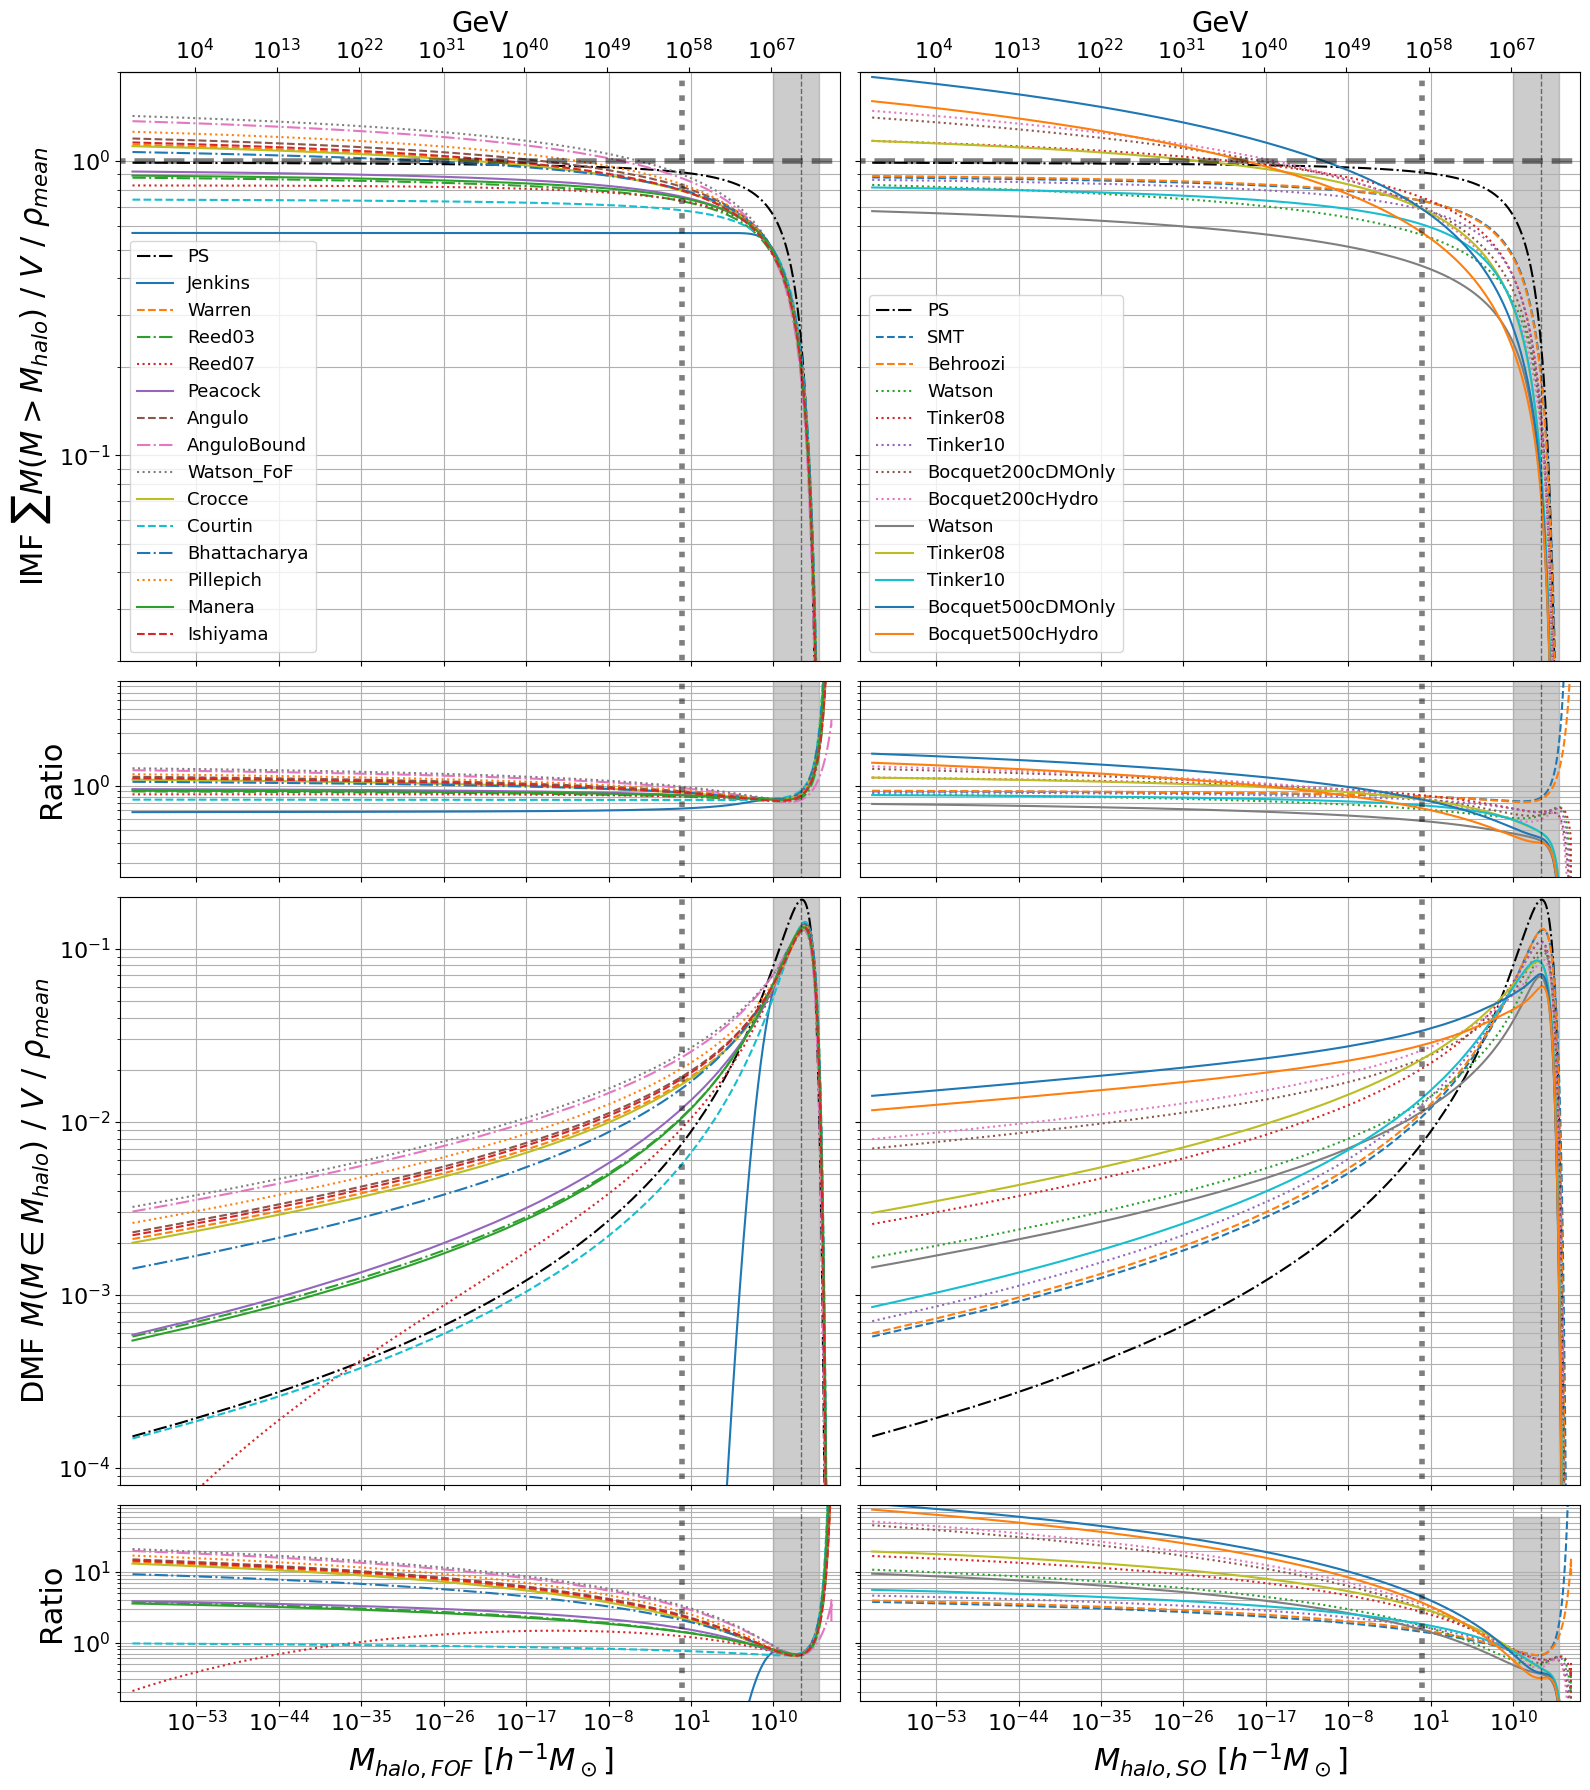

In [30]:
# for IMF and DMF
fig, axs = plt.subplots(4, 2, figsize=(16, 18),  sharey='row', sharex='col', gridspec_kw={'height_ratios': [3, 1, 3, 1]})
md=cal_mean_dens(ad_def['cosmo'])
for i, hn in enumerate(['IMF', 'DMF']):
    lines = ["-","--","-.",":"]
    linecycler = cycle(lines)
    axs[i*2,0].loglog(ad_def[hn]['X'], ad_def[hn]['PS']/mf_so.mean_density0, color='k', ls='-.', label='PS')
    axs[i*2,1].loglog(ad_def[hn]['X'], ad_def[hn]['PS']/mf_so.mean_density0, color='k', ls='-.', label='PS')
    
    for j, fn in enumerate(ad_def[hn]['FOF'].keys()):
        p=axs[i*2,0].loglog(ad_def[hn]['X'], ad_def[hn]['FOF'][fn]/md,  ls=next(linecycler), label=fn)
        axs[i*2+1,0].loglog(ad_def[hn]['X'], ad_def[hn]['FOF'][fn]/ad_def[hn]['PS'], color=p[0].get_color(), ls=p[0].get_linestyle(), label=fn)
        
    for j, fn in enumerate(ad_def[hn]['SOvir'].keys()):
        if fn == 'ST': continue
        p=axs[i*2,1].loglog(ad_def[hn]['X'], ad_def[hn]['SOvir'][fn]/md,  ls='--', label=fn)
        axs[i*2+1,1].loglog(ad_def[hn]['X'], ad_def[hn]['SOvir'][fn]/ad_def[hn]['PS'], color=p[0].get_color(), ls='--', label=fn)
        
    for j, fn in enumerate(ad_def[hn]['SO200c'].keys()):
        p=axs[i*2,1].loglog(ad_def[hn]['X'], ad_def[hn]['SO200c'][fn]/md,  ls=':', label=fn)
        axs[i*2+1,1].loglog(ad_def[hn]['X'], ad_def[hn]['SO200c'][fn]/ad_def[hn]['PS'], color=p[0].get_color(), ls=':', label=fn)
        
    for j, fn in enumerate(ad_def[hn]['SO500c'].keys()):
        p=axs[i*2,1].loglog(ad_def[hn]['X'], ad_def[hn]['SO500c'][fn]/md,  ls='-', label=fn)
        axs[i*2+1,1].loglog(ad_def[hn]['X'], ad_def[hn]['SO500c'][fn]/ad_def[hn]['PS'], color=p[0].get_color(), ls='-', label=fn)

axs[0,0].loglog([1e-63,1e18],[1,1],'k--', lw=4, alpha=0.5)
axs[0,1].loglog([1e-63,1e18],[1,1],'k--', lw=4, alpha=0.5)


#twin axis# Define function and its inverse
f = lambda x: x/1.6462e57   #units from Msun/h to Gev
g = lambda x: 1.6462e57*x
ax2 = axs[0,0].secondary_xaxis("top", functions=(g,f))
ax2.set_xlabel("GeV")
ax3 = axs[0,1].secondary_xaxis("top", functions=(g,f))
ax3.set_xlabel("GeV")

for axx in axs.flatten():
    axx.fill_betweenx([1e-5,60],1e10,x2=1e15, color='0.5', alpha=0.4)
    axx.loglog([1,1],[1e-5,100],'k:', lw=4, alpha=0.5)
    axx.loglog([1e13,1e13],[1e-5,100],'k--', lw=1, alpha=0.5)
    # axx.loglog([1e14,1e14],[1e-5,100],'k--', lw=1, alpha=0.5)
    axx.grid(which='both')
axs[0,0].legend(fontsize=13)
axs[0,1].legend(fontsize=13)
axs[0,0].set_ylim(2e-2,2)
axs[0,0].set_xlim(5e-62,2e17)
axs[0,1].set_xlim(5e-62,2e17)
axs[1,0].set_ylim(1.5e-1,9)
axs[2,0].set_ylim(8e-5,0.2)
axs[3,0].set_ylim(1.5e-1,90)
# ax2.grid()
# ax1.set_xlabel(r"Mass, $[h^{-1}M_\odot]$",fontsize=20)
# ax1.set_ylabel(r"$dn/dm$, $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$",fontsize=20)
# ax2.set_xlabel(r"Mass, $[h^{-1}M_\odot]$",fontsize=20)
axs[3,0].set_xlabel(r"$M_{halo, FOF}\ [h^{-1}M_\odot]$",fontsize=22)
axs[1,0].set_ylabel(r"Ratio",fontsize=22)
axs[0,0].set_ylabel(r"IMF $\sum M(M>M_{halo}) \ / \ V \ / \ \rho_{mean}$",fontsize=22)
axs[2,0].set_ylabel(r"DMF $M (M \in M_{halo}) \ / \ V \ / \ \rho_{mean}$",fontsize=22)
axs[3,0].set_ylabel(r"Ratio",fontsize=22)
axs[3,1].set_xlabel(r"$M_{halo, SO}\ [h^{-1}M_\odot]$",fontsize=22)

fig.tight_layout()
fig.savefig('idmf.pdf',dpi=300)

None: PS


/home2/weiguang/.local/lib/python3.8/site-packages/hmf/mass_function/hmf.py:299: UserWarning: Your input mass definition 'FoF(l=0.2)' does not match the mass definition in which the hmf fit PS was measured:'None'. The mass function will be converted to your input definition, but note that some properties do not survive the conversion, eg. the integral of the hmf over mass yielding the total mean density.
  warnings.warn(
/home2/weiguang/.local/lib/python3.8/site-packages/hmf/mass_function/hmf.py:299: UserWarning: Your input mass definition 'SOVirial' does not match the mass definition in which the hmf fit PS was measured:'None'. The mass function will be converted to your input definition, but note that some properties do not survive the conversion, eg. the integral of the hmf over mass yielding the total mean density.
  warnings.warn(
/home2/weiguang/.local/lib/python3.8/site-packages/hmf/mass_function/hmf.py:299: UserWarning: Your input mass definition 'SOCritical(200)' does not matc

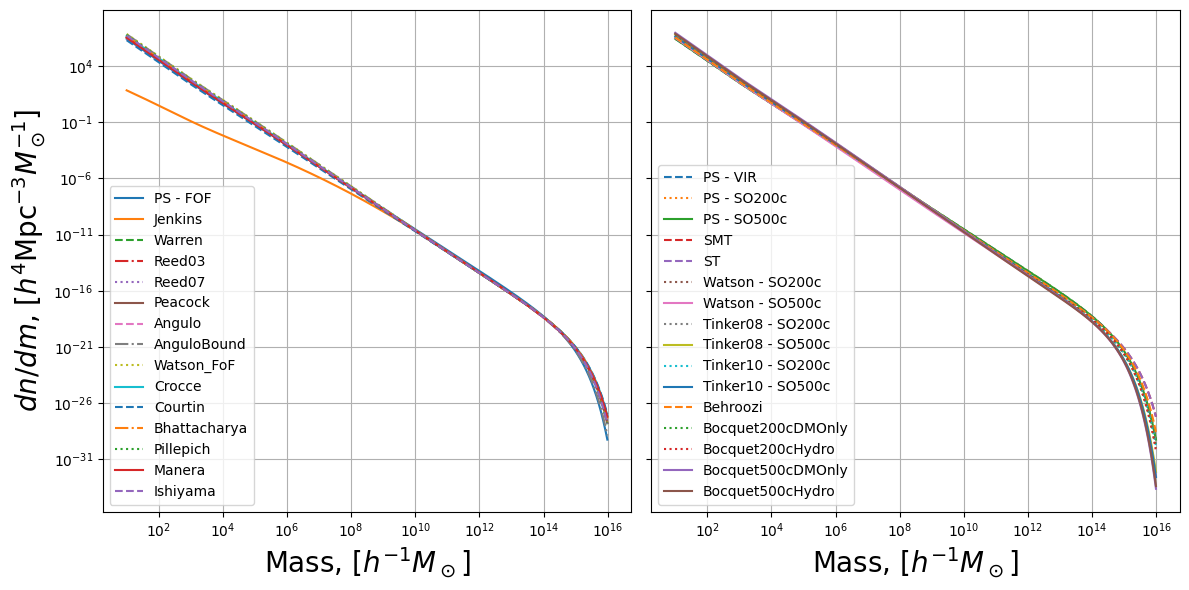

In [99]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),  sharey=True)
for name, cls in fitting_functions.__dict__.items():
    if isinstance(cls, type) and name not in ['_spline','SimDetails','FittingFunction']:
        if cls.get_measured_mdef() is None:
            print('None:', name)
            mf_ps=MassFunction(Mmin=-8,Mmax=17,z=0,hmf_model="PS",   transfer_model='CAMB',  transfer_params={"kmax": 1000, "extrapolate_with_eh": True})
            mf_ps.disable_mass_conversion=False
            mf_ps.update( mdef_model  = "FOF", mdef_params = {"linking_length": 0.2})
            ax1.loglog(mf_ps.m,mf_ps.dndm, label='PS - FOF')
            mf_ps.update( mdef_model  = "SOVirial", mdef_params = {})
            ax2.loglog(mf_ps.m,mf_ps.dndm, ls='--', label='PS - VIR')
            mf_ps.update( mdef_model  = "SOCritical", mdef_params = {"overdensity": 200})
            ax2.loglog(mf_ps.m,mf_ps.dndm, ls=':', label='PS - SO200c')
            mf_ps.update( mdef_model  = "SOCritical", mdef_params = {"overdensity": 500})
            ax2.loglog(mf_ps.m,mf_ps.dndm, ls='-', label='PS - SO500c')
        else:            
            # print(name, cls.get_measured_mdef().colossus_name)
            if cls.get_measured_mdef().colossus_name == 'fof':
                mf_fof.update( hmf_model  = name, mdef_params = {"linking_length": 0.2})
                ax1.loglog(mf_fof.m,mf_fof.dndm, ls=next(linecycler), label=name)
            elif cls.get_measured_mdef().colossus_name == 'vir':
                mf_vir.update( hmf_model  = name, mdef_params = {})
                ax2.loglog(mf_vir.m,mf_vir.dndm, ls='--', label=name+ ' - VIR')
            elif cls.get_measured_mdef().colossus_name is None:
                mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 200})
                ax2.loglog(mf_so.m,mf_so.dndm, ls=':', label=name+' - SO200c')
                mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 500})
                ax2.loglog(mf_so.m,mf_so.dndm, ls='-', label=name +' - SO500c')
            else:
                if '200m' in name:
                    continue

                if '200c' in name:
                    lsy=':'
                    mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 200})
                else:
                    lsy='-'
                    mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 500})
                ax2.loglog(mf_so.m,mf_so.dndm, ls=lsy, label=name)
                # print(cls.get_measured_mdef().params)
ax1.legend()
ax2.legend()
ax1.grid()
ax2.grid()
ax1.set_xlabel(r"Mass, $[h^{-1}M_\odot]$",fontsize=20)
ax1.set_ylabel(r"$dn/dm$, $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$",fontsize=20)
ax2.set_xlabel(r"Mass, $[h^{-1}M_\odot]$",fontsize=20)
fig.tight_layout()

None: PS


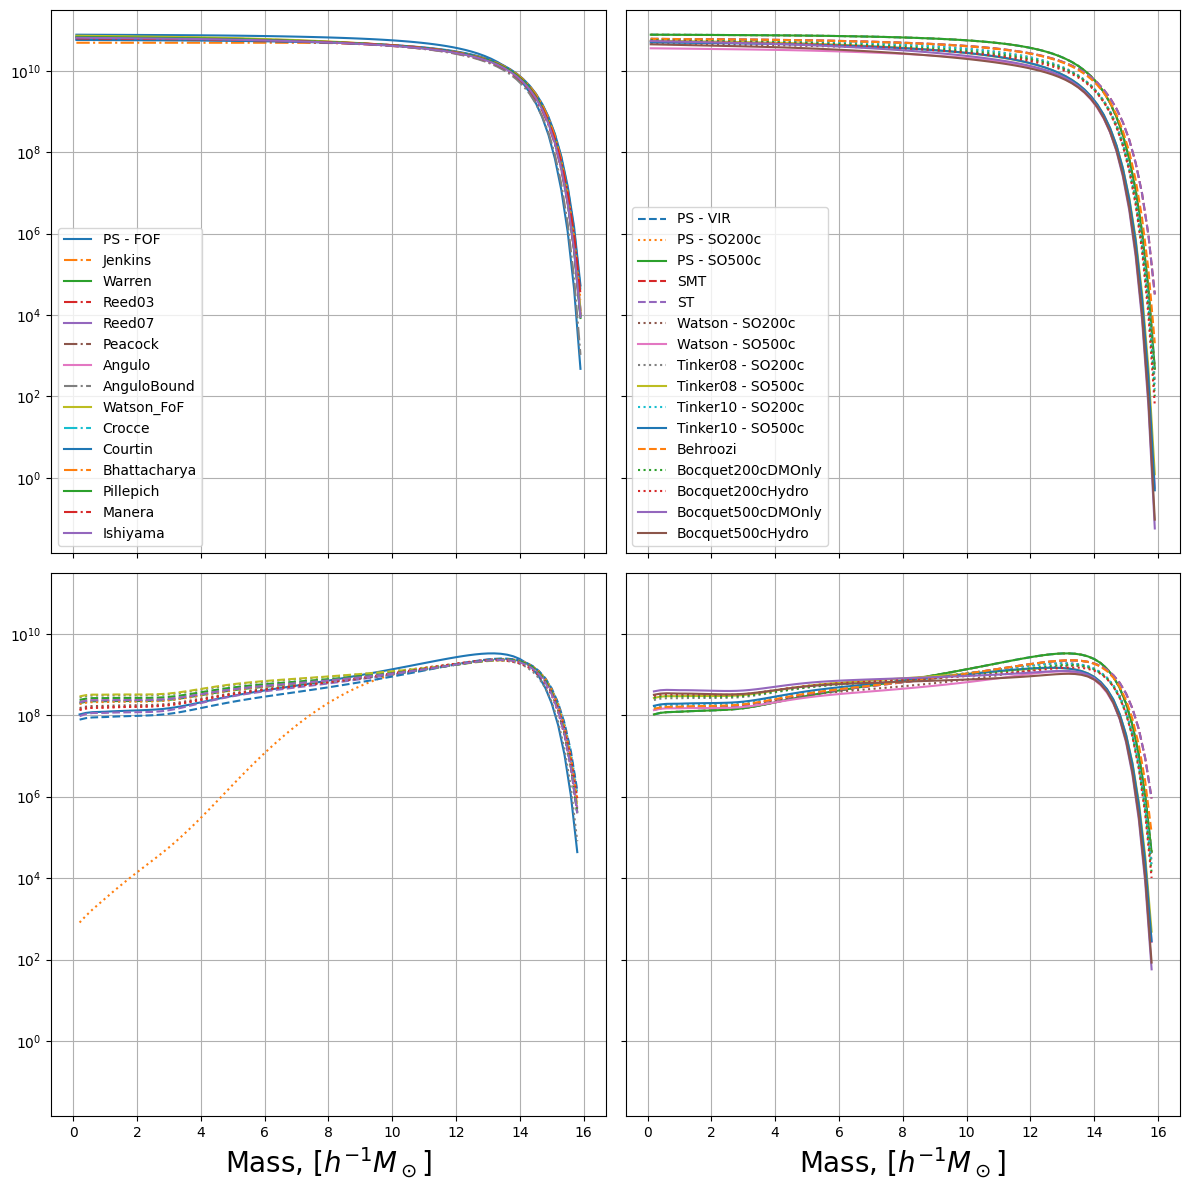

In [102]:
# for integrated and differential mass 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12),  sharey=True,sharex=True)
for name, cls in fitting_functions.__dict__.items():
    if isinstance(cls, type) and name not in ['_spline','SimDetails','FittingFunction']:
        if cls.get_measured_mdef() is None:
            print('None:', name)
            mf_ps=MassFunction(Mmin=-8,Mmax=17,z=0,hmf_model="PS",   transfer_model='CAMB',  transfer_params={"kmax": 1000, "extrapolate_with_eh": True})
            mf_ps.disable_mass_conversion=False
            mf_ps.update( mdef_model  = "FOF", mdef_params = {"linking_length": 0.2})
            xi,mi,xf,mf=cal_integ_mass(mf_ps)
            ax1.plot(xi,mi, label='PS - FOF')
            ax3.plot(xf,mf, label='PS - FOF')
            
            mf_ps.update( mdef_model  = "SOVirial", mdef_params = {})
            xi,mi,xf,mf=cal_integ_mass(mf_ps)
            ax2.plot(xi,mi, ls='--', label='PS - VIR')
            ax4.plot(xf,mf, ls='--', label='PS - VIR')

            mf_ps.update( mdef_model  = "SOCritical", mdef_params = {"overdensity": 200})
            xi,mi,xf,mf=cal_integ_mass(mf_ps)
            ax2.plot(xi,mi, ls=':', label='PS - SO200c')
            ax4.plot(xf,mf, ls=':', label='PS - SO200c')

            mf_ps.update( mdef_model  = "SOCritical", mdef_params = {"overdensity": 500})
            xi,mi,xf,mf=cal_integ_mass(mf_ps)
            ax2.plot(xi,mi, ls='-', label='PS - SO500c')
            ax4.plot(xf,mf, ls='-', label='PS - SO500c')
        else:            
            # print(name, cls.get_measured_mdef().colossus_name)
            if cls.get_measured_mdef().colossus_name == 'fof':
                mf_fof.update( hmf_model  = name, mdef_params = {"linking_length": 0.2})
                xi,mi,xf,mf=cal_integ_mass(mf_fof)
                ax1.plot(xi,mi, ls=next(linecycler), label=name)
                ax3.plot(xf,mf, ls=next(linecycler), label=name)

            elif cls.get_measured_mdef().colossus_name == 'vir':
                mf_vir.update( hmf_model  = name, mdef_params = {})
                xi,mi,xf,mf=cal_integ_mass(mf_vir)
                ax2.plot(xi,mi, ls='--', label=name+ ' - VIR')
                ax4.plot(xf,mf, ls='--', label=name+ ' - VIR')

            elif cls.get_measured_mdef().colossus_name is None:
                mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 200})
                xi,mi,xf,mf=cal_integ_mass(mf_so)
                ax2.plot(xi,mi, ls=':', label=name+' - SO200c')
                ax4.plot(xf,mf, ls=':', label=name+' - SO200c')

                mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 500})
                xi,mi,xf,mf=cal_integ_mass(mf_so)
                ax2.plot(xi,mi, ls='-', label=name +' - SO500c')
                ax4.plot(xf,mf, ls='-', label=name +' - SO500c')

            else:
                if '200m' in name:
                    continue

                if '200c' in name:
                    lsy=':'
                    mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 200})
                    
                else:
                    lsy='-'
                    mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 500})
                xi,mi,xf,mf=cal_integ_mass(mf_so)
                ax2.plot(xi,mi, ls=lsy, label=name)
                ax4.plot(xf,mf, ls=lsy, label=name)

                # print(cls.get_measured_mdef().params)
ax1.legend()
ax1.set_yscale('log')
ax2.legend()
ax3.set_yscale('log')
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax3.set_xlabel(r"Mass, $[h^{-1}M_\odot]$",fontsize=20)
# ax1.set_ylabel(r"$dn/dm$, $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$",fontsize=20)
ax4.set_xlabel(r"Mass, $[h^{-1}M_\odot]$",fontsize=20)
fig.tight_layout()

# for different cosmology runs

## 1. sigma 8

In [31]:
# gather the data in a dictionary
if os.path.isfile('ad_sig.npy'):
    ad_sig=np.load('ad_sig.npy',allow_pickle=True).item()
    sig8=[0.6,0.65,0.7,0.75,0.8,0.85,0.9]
else:
    ad_sig={}
    sig8=[0.6,0.65,0.7,0.75,0.8,0.85,0.9]
    mf_fof=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="Jenkins", lnk_min=-30, lnk_max=100, transfer_model='EH_BAO', cosmo_model=cosmology.cosmo.Planck15)
                        # transfer_model='CAMB',  transfer_params={"kmax": 500, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15)
    mf_vir=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="ST", lnk_min=-30, lnk_max=100, transfer_model='EH_BAO', cosmo_model=cosmology.cosmo.Planck15)
                        # transfer_model='CAMB',  transfer_params={"kmax": 500, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15)
    mf_so=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="Watson", mdef_model  = "SOCritical", mdef_params = {"overdensity": 500}, lnk_min=-30, lnk_max=100,
                       transfer_model='EH_BAO', cosmo_model=cosmology.cosmo.Planck15)
                       # transfer_model='CAMB',  transfer_params={"kmax": 500, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15)
    for j in sig8:
        s8=str(j)
        ad_sig[s8]={}
        ad_sig[s8]['HMF']={}; ad_sig[s8]['HMFlog']={}; ad_sig[s8]['IMF']={}; ad_sig[s8]['DMF']={}; 
        for i in ad_sig[s8].keys():
            ad_sig[s8][i]['FOF']={}; ad_sig[s8][i]['SOvir']={}; ad_sig[s8][i]['SO200c']={};ad_sig[s8][i]['SO500c']={};

        mf_fof.update(sigma_8=j)
        mf_vir.update(sigma_8=j)
        mf_so.update(sigma_8=j)
        ad_sig[s8]['cosmo']=mf_so.cosmo
        for name, cls in allff:
            if isinstance(cls, type) and name not in ['_spline','SimDetails','FittingFunction','Mydouble']:
                if cls.get_measured_mdef() is None:
                    print('None:', name)
                    mf_ps=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="PS", lnk_min=-30, lnk_max=100, 
                                       transfer_model='EH_BAO', cosmo_model=cosmology.cosmo.Planck15, sigma_8=j)
                                       # transfer_model='CAMB',  transfer_params={"kmax": 500, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15,sigma_8=j)
                    ad_sig[s8]['HMF']['PS'] = mf_ps.dndm
                    ad_sig[s8]['HMFlog']['PS'] = mf_ps.dndlog10m
                    ad_sig[s8]['HMF']['X'] = ad_sig[s8]['HMFlog']['X'] = mf_ps.m
                    
                    xi,mi,xf,mf=cal_integ_mass(mf_ps)
                    ad_sig[s8]['IMF']['PS'] = mi
                    ad_sig[s8]['IMF']['X'] = xi
                    ad_sig[s8]['DMF']['PS'] = mf
                    ad_sig[s8]['DMF']['X'] = xf
                    
                else:            
                    # print(name, cls.get_measured_mdef().colossus_name)
                    if cls.get_measured_mdef().colossus_name == 'fof':
                        mf_fof.update( hmf_model  = name, mdef_params = {"linking_length": 0.2})
                        ad_sig[s8]['HMF']['FOF'][name] = mf_fof.dndm
                        ad_sig[s8]['HMFlog']['FOF'][name] = mf_fof.dndlog10m
                        if not np.array_equal(ad_sig[s8]['HMF']['X'], mf_fof.m):
                            print('the axis is not same between HMF/X and FOF/'+name, ad_sig[s8]['HMF']['X'], mf_fof.m)
                            
                        xi,mi,xf,mf=cal_integ_mass(mf_fof)
                        ad_sig[s8]['IMF']['FOF'][name] = mi
                        if not np.array_equal(ad_sig[s8]['IMF']['X'], xi):
                            print('the axis is not same between IMF/X and FOF/'+name)
                        ad_sig[s8]['DMF']['FOF'][name] = mf
                        if not np.array_equal(ad_sig[s8]['DMF']['X'], xf):
                            print('the axis is not same between DMF/X and FOF/'+name)
                    elif cls.get_measured_mdef().colossus_name == 'vir':
                        mf_vir.update( hmf_model  = name, mdef_params = {})
                        # print('VIR: name: ', name, ' x: ',mf_vir.m)
                        ad_sig[s8]['HMF']['SOvir'][name] = mf_vir.dndm
                        ad_sig[s8]['HMFlog']['SOvir'][name] = mf_vir.dndlog10m
                        if not np.array_equal(ad_sig[s8]['HMF']['X'], mf_vir.m):
                            print('the axis is not same between HMF/X and SOvir/'+name, ad_sig[s8]['HMF']['X'], mf_vir.m)
                            
                        xi,mi,xf,mf=cal_integ_mass(mf_vir)
                        ad_sig[s8]['IMF']['SOvir'][name] = mi
                        if not np.array_equal(ad_sig[s8]['IMF']['X'], xi):
                            print('the axis is not same between IMF/X and SOvir/'+name)
                        ad_sig[s8]['DMF']['SOvir'][name] = mf
                        if not np.array_equal(ad_sig[s8]['DMF']['X'], xf):
                            print('the axis is not same between DMF/X and SOvir/'+name)
        
                    elif cls.get_measured_mdef().colossus_name is None:
                        mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 200})
                        ad_sig[s8]['HMF']['SO200c'][name] = mf_so.dndm
                        ad_sig[s8]['HMFlog']['SO200c'][name] = mf_so.dndlog10m
                        if not np.array_equal(ad_sig[s8]['HMF']['X'], mf_so.m):
                            print('the axis is not same between HMF/X and SO200c/'+name, ad_sig[s8]['HMF']['X'], mf_so.m)
                            
                        xi,mi,xf,mf=cal_integ_mass(mf_so)
                        ad_sig[s8]['IMF']['SO200c'][name] = mi
                        if not np.array_equal(ad_sig[s8]['IMF']['X'], xi):
                            print('the axis is not same between IMF/X and SO200c/'+name)
                        ad_sig[s8]['DMF']['SO200c'][name] = mf
                        if not np.array_equal(ad_sig[s8]['DMF']['X'], xf):
                            print('the axis is not same between DMF/X and SO200c/'+name)
                            
                        mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 500})
                        ad_sig[s8]['HMF']['SO500c'][name] = mf_so.dndm
                        ad_sig[s8]['HMFlog']['SO500c'][name] = mf_so.dndlog10m
                        if not np.array_equal(ad_sig[s8]['HMF']['X'], mf_so.m):
                            print('the axis is not same between HMF/X and SO500c/'+name, ad_sig[s8]['HMF']['X'], mf_so.m)
                            
                        xi,mi,xf,mf=cal_integ_mass(mf_so)
                        ad_sig[s8]['IMF']['SO500c'][name] = mi
                        if not np.array_equal(ad_sig[s8]['IMF']['X'], xi):
                            print('the axis is not same between IMF/X and SO500c/'+name)
                        ad_sig[s8]['DMF']['SO500c'][name] = mf
                        if not np.array_equal(ad_sig[s8]['DMF']['X'], xf):
                            print('the axis is not same between DMF/X and SO500c/'+name)
                    else:
                        if '200m' in name:
                            continue
        
                        if '200c' in name:
                            mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 200})
                            ad_sig[s8]['HMF']['SO200c'][name] = mf_so.dndm
                            ad_sig[s8]['HMFlog']['SO200c'][name] = mf_so.dndlog10m
                            if not np.array_equal(ad_sig[s8]['HMF']['X'], mf_so.m):
                                print('the axis is not same between HMF/X and SO200c/'+name, ad_sig[s8]['HMF']['X'], mf_so.m)
                                
                            xi,mi,xf,mf=cal_integ_mass(mf_so)
                            ad_sig[s8]['IMF']['SO200c'][name] = mi
                            if not np.array_equal(ad_sig[s8]['IMF']['X'], xi):
                                print('the axis is not same between IMF/X and SO200c/'+name)
                            ad_sig[s8]['DMF']['SO200c'][name] = mf
                            if not np.array_equal(ad_sig[s8]['DMF']['X'], xf):
                                print('the axis is not same between DMF/X and SO200c/'+name)
                        else:
                            mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 500})
                            ad_sig[s8]['HMF']['SO500c'][name] = mf_so.dndm
                            ad_sig[s8]['HMFlog']['SO500c'][name] = mf_so.dndlog10m
                            if not np.array_equal(ad_sig[s8]['HMF']['X'], mf_so.m):
                                print('the axis is not same between HMF/X and SO500c/'+name, ad_sig[s8]['HMF']['X'], mf_so.m)
                                
                            xi,mi,xf,mf=cal_integ_mass(mf_so)
                            ad_sig[s8]['IMF']['SO500c'][name] = mi
                            if not np.array_equal(ad_sig[s8]['IMF']['X'], xi):
                                print('the axis is not same between IMF/X and SO500c/'+name)
                            ad_sig[s8]['DMF']['SO500c'][name] = mf
                            if not np.array_equal(ad_sig[s8]['DMF']['X'], xf):
                                print('the axis is not same between DMF/X and SO500c/'+name)
    np.save('ad_sig',ad_sig)
    # with open('ad_sig.pkl', 'wb') as f:
    #     pickle.dump(ad_def, f)

/tmp/ipykernel_249526/76161649.py:16: RuntimeWarning: invalid value encountered in divide
  axs[i*2+1].plot(ad_sig[s8][hn]['X'], ad_sig[s8][hn]['FOF']['Angulo']/nm2/ad_def[hn]['FOF']['Angulo']*nm1,ls='-',lw=1,color=p[0].get_color())
/tmp/ipykernel_249526/76161649.py:19: RuntimeWarning: invalid value encountered in divide
  axs[i*2+1].loglog(ad_sig[s8][hn]['X'], ad_sig[s8][hn]['SOvir']['SMT']/nm2/ad_def[hn]['SOvir']['SMT']*nm1,ls='--',lw=1,color=p[0].get_color())
/tmp/ipykernel_249526/76161649.py:22: RuntimeWarning: invalid value encountered in divide
  axs[i*2+1].loglog(ad_sig[s8][hn]['X'], ad_sig[s8][hn]['SO500c']['Tinker08']/nm2/ad_def[hn]['SO500c']['Tinker08']*nm1,ls=':',lw=1,color=p[0].get_color())
/tmp/ipykernel_249526/76161649.py:16: RuntimeWarning: divide by zero encountered in divide
  axs[i*2+1].plot(ad_sig[s8][hn]['X'], ad_sig[s8][hn]['FOF']['Angulo']/nm2/ad_def[hn]['FOF']['Angulo']*nm1,ls='-',lw=1,color=p[0].get_color())
/tmp/ipykernel_249526/76161649.py:19: RuntimeWarning: 

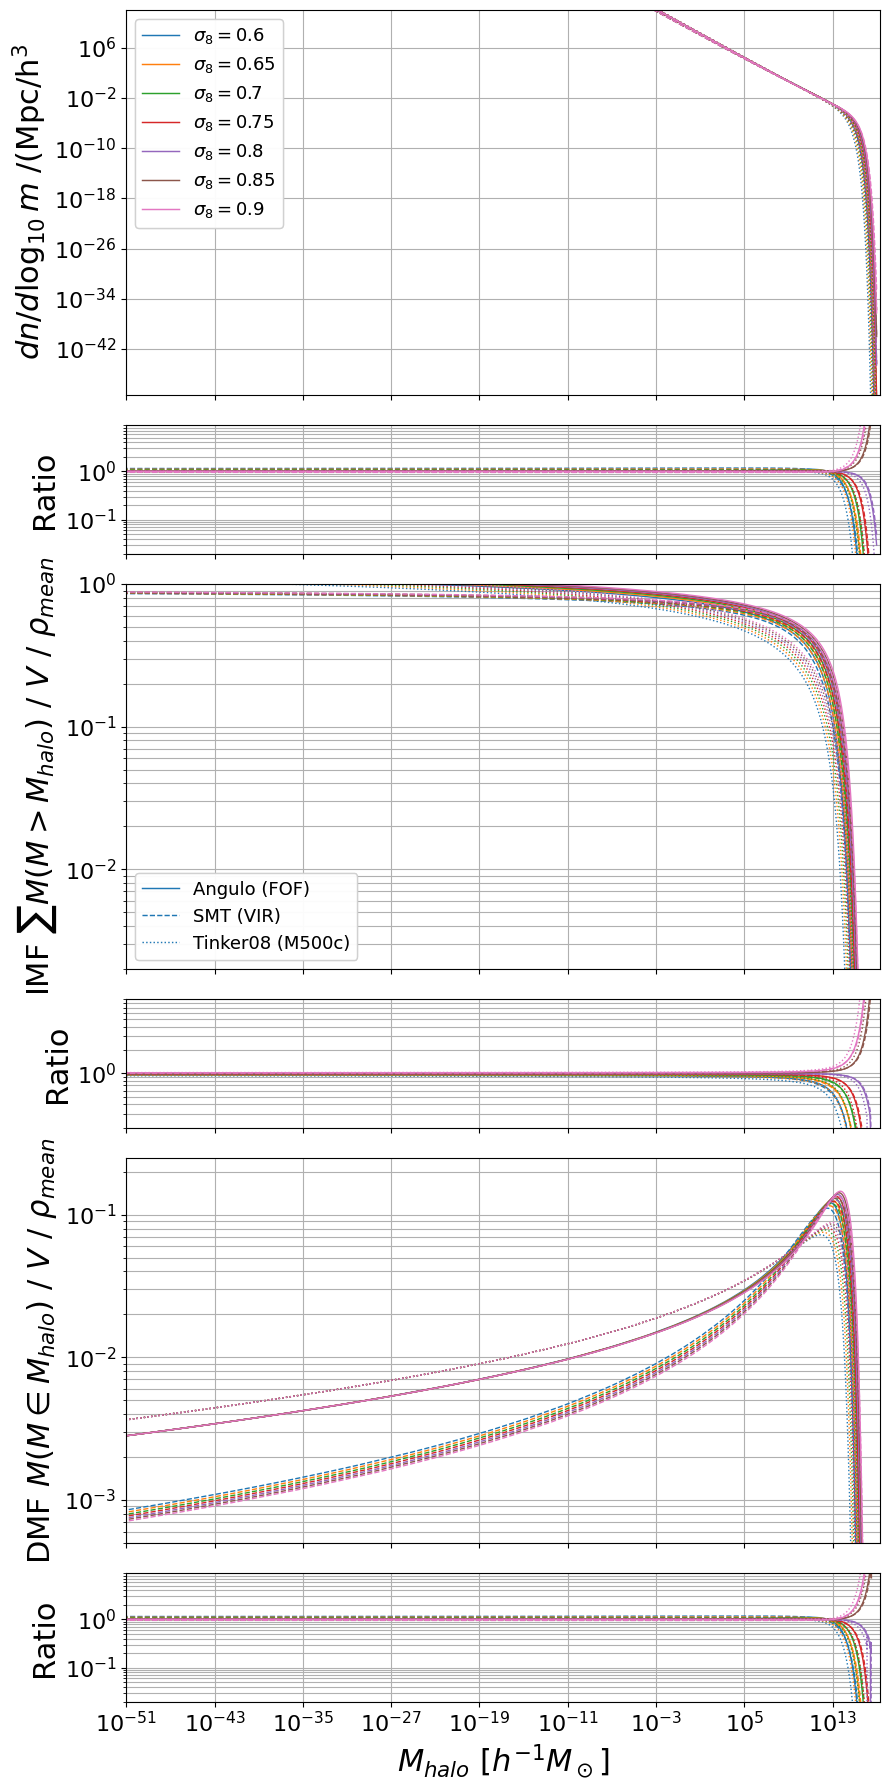

In [33]:
fig, axs = plt.subplots(6, 1, figsize=(9, 18),  sharey='row', sharex='col', gridspec_kw={'height_ratios': [3, 1, 3, 1, 3, 1]})
md=cal_mean_dens(ad_def['cosmo'])

for j in sig8:
    s8=str(j)
    mdc=cal_mean_dens(ad_sig[s8]['cosmo'])
    for i, hn in enumerate(['HMFlog', 'IMF', 'DMF']):
        if i == 0:
            nm1=1; nm2=1
            # origdata=ad_def_log10m
        else:
            nm1=md; nm2=mdc
            # origdata=ad_def[hn]
            
        p=axs[i*2].loglog(ad_sig[s8][hn]['X'], ad_sig[s8][hn]['FOF']['Angulo']/nm2, ls='-', lw=1)
        axs[i*2+1].plot(ad_sig[s8][hn]['X'], ad_sig[s8][hn]['FOF']['Angulo']/nm2/ad_def[hn]['FOF']['Angulo']*nm1,ls='-',lw=1,color=p[0].get_color())
        
        axs[i*2].loglog(ad_sig[s8][hn]['X'], ad_sig[s8][hn]['SOvir']['Behroozi']/nm2, ls='--', lw=1, color=p[0].get_color())
        axs[i*2+1].loglog(ad_sig[s8][hn]['X'], ad_sig[s8][hn]['SOvir']['Behroozi']/nm2/ad_def[hn]['SOvir']['Behroozi']*nm1,ls='--',lw=1,color=p[0].get_color())
    
        axs[i*2].loglog(ad_sig[s8][hn]['X'], ad_sig[s8][hn]['SO500c']['Tinker08']/nm2, ls=':', lw=1, color=p[0].get_color())
        axs[i*2+1].loglog(ad_sig[s8][hn]['X'], ad_sig[s8][hn]['SO500c']['Tinker08']/nm2/ad_def[hn]['SO500c']['Tinker08']*nm1,ls=':',lw=1,color=p[0].get_color())

# for axx in [axs[1], axs[3], axs[5]]:
#     axx.plot([1e-9,1e17],[1,1], 'k-')

lines = axs[0].get_lines()
legend2 = axs[0].legend([lines[i] for i in np.arange(0,3*len(sig8),3)], [r'$\sigma_8 = $'+str(i) for i in sig8], fontsize=13)
axs[0].add_artist(legend2)

lines = axs[2].get_lines()
legend1 = axs[2].legend([lines[i] for i in [0,1,2]], ["Angulo (FOF)", "Behroozi (VIR)", "Tinker08 (M500c)"], fontsize=13)
axs[2].add_artist(legend1)

for axx in axs:
    axx.grid(which='both')
axs[0].set_ylim(5e-50,1e12)
axs[0].set_xlim(1e-1,2e17)
axs[2].set_ylim(2e-3,1)
axs[4].set_ylim(5e-4,0.25)
axs[1].set_ylim(2e-2,9)
axs[3].set_ylim(2e-1,9)
axs[5].set_ylim(2e-2,9)

# axs[0].set_ylabel(r"$dn/dm$ $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$",fontsize=22)
axs[0].set_ylabel(r"$dn/d\log_{10} m \ / ({\rm Mpc/h}^{3}$",fontsize=22)

axs[1].set_ylabel(r"Ratio",fontsize=22)
axs[2].set_ylabel(r"IMF $\sum M(M>M_{halo}) \ / \ V \ / \ \rho_{mean}$",fontsize=22)
axs[3].set_ylabel(r"Ratio",fontsize=22)
axs[4].set_ylabel(r"DMF $M (M \in M_{halo}) \ / \ V \ / \ \rho_{mean}$",fontsize=22)
axs[5].set_ylabel(r"Ratio",fontsize=22)
axs[5].set_xlabel(r"$M_{halo}\ [h^{-1}M_\odot]$",fontsize=22)

fig.tight_layout()
fig.savefig('sig8_mfs.pdf',dpi=300)

In [286]:
ad_sig[s8][hn]['FOF']['Angulo']/ad_def[hn]['FOF']['Angulo']

array([0.99474371, 0.99464184, 0.99453279, 0.99442013, 0.99430539,
       0.99418812, 0.994068  , 0.99394545, 0.99382058, 0.99369337,
       0.9935638 , 0.99343159, 0.99329618, 0.99315654, 0.9930111 ,
       0.99285783, 0.99269453, 0.99251906, 0.99232953, 0.99212412,
       0.99190115, 0.99165905, 0.99139647, 0.99111218, 0.99080517,
       0.99047458, 0.99011967, 0.98973977, 0.98933418, 0.98890211,
       0.98844264, 0.98795473, 0.98743722, 0.98688882, 0.98630812,
       0.98569364, 0.98504387, 0.98435726, 0.98363233, 0.98286769,
       0.98206213, 0.98121474, 0.98032501, 0.97939301, 0.9784196 ,
       0.97740672, 0.97635766, 0.97527759, 0.97417402, 0.97305757,
       0.97194277, 0.97084927, 0.96980316, 0.96883878, 0.96800098,
       0.96734799, 0.96695502, 0.96691895, 0.96736434, 0.96845126,
       0.97038563, 0.97343307, 0.97793777, 0.98434885, 0.99325742,
       1.00545132, 1.02199524, 1.04435507, 1.07459066, 1.11567247,
       1.17200712, 1.25035638, 1.36150408, 1.52345245, 1.76793

## 2. Omega m

In [ ]:
# gather the data in a dictionary
if os.path.isfile('ad_om0.ny'):
    ad_om0=np.load('ad_om0.npy',allow_pickle=True).item()
else:
    ad_om0={}
    om0=[0.2,0.24,0.28,0.32,0.34,0.38, 0.42] #[0.6,0.65,0.7,0.75,0.8,0.85,0.9]
    mf_fof=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="Jenkins", lnk_min=-30, lnk_max=100, transfer_model='EH_BAO', cosmo_model=cosmology.cosmo.Planck15)
                        # transfer_model='CAMB',  transfer_params={"kmax": 500, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15)
    mf_vir=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="ST", lnk_min=-30, lnk_max=100, transfer_model='EH_BAO', cosmo_model=cosmology.cosmo.Planck15)
                        # transfer_model='CAMB',  transfer_params={"kmax": 500, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15)
    mf_so=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="Watson", mdef_model  = "SOCritical", mdef_params = {"overdensity": 500}, lnk_min=-30, lnk_max=100,
                       transfer_model='EH_BAO', cosmo_model=cosmology.cosmo.Planck15)
                       # transfer_model='CAMB',  transfer_params={"kmax": 500, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15)
    for j in om0:
        s8=str(j)
        ad_om0[s8]={}
        ad_om0[s8]['HMF']={}; ad_om0[s8]['HMFlog']={}; ad_om0[s8]['IMF']={}; ad_om0[s8]['DMF']={}; 
        for i in ad_om0[s8].keys():
            ad_om0[s8][i]['FOF']={}; ad_om0[s8][i]['SOvir']={}; ad_om0[s8][i]['SO200c']={};ad_om0[s8][i]['SO500c']={};

        mf_fof.update(cosmo_params={"Om0":j})
        mf_vir.update(cosmo_params={"Om0":j})
        mf_so.update(cosmo_params={"Om0":j})
        ad_om0[s8]['cosmo']=mf_so.cosmo
        for name, cls in allff:
            if isinstance(cls, type) and name not in ['_spline','SimDetails','FittingFunction','Mydouble']:
                if cls.get_measured_mdef() is None:
                    print('None:', name)
                    mf_ps=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="PS", lnk_min=-30, lnk_max=100, 
                                       transfer_model='EH_BAO', cosmo_model=cosmology.cosmo.Planck15, cosmo_params={"Om0":j})
                                       # transfer_model='CAMB', transfer_params={"kmax": 500, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15,cosmo_params={"Om0":j})
                    ad_om0[s8]['HMF']['PS'] = mf_ps.dndm
                    ad_om0[s8]['HMFlog']['PS'] = mf_ps.dndlog10m
                    ad_om0[s8]['HMF']['X'] = ad_om0[s8]['HMFlog']['X'] = mf_ps.m
                    
                    xi,mi,xf,mf=cal_integ_mass(mf_ps)
                    ad_om0[s8]['IMF']['PS'] = mi
                    ad_om0[s8]['IMF']['X'] = xi
                    ad_om0[s8]['DMF']['PS'] = mf
                    ad_om0[s8]['DMF']['X'] = xf
                    
                else:            
                    # print(name, cls.get_measured_mdef().colossus_name)
                    if cls.get_measured_mdef().colossus_name == 'fof':
                        mf_fof.update( hmf_model  = name, mdef_params = {"linking_length": 0.2})
                        ad_om0[s8]['HMF']['FOF'][name] = mf_fof.dndm
                        ad_om0[s8]['HMFlog']['FOF'][name] = mf_fof.dndlog10m
                        if not np.array_equal(ad_om0[s8]['HMF']['X'], mf_fof.m):
                            print('the axis is not same between HMF/X and FOF/'+name, ad_om0[s8]['HMF']['X'], mf_fof.m)
                            
                        xi,mi,xf,mf=cal_integ_mass(mf_fof)
                        ad_om0[s8]['IMF']['FOF'][name] = mi
                        if not np.array_equal(ad_om0[s8]['IMF']['X'], xi):
                            print('the axis is not same between IMF/X and FOF/'+name)
                        ad_om0[s8]['DMF']['FOF'][name] = mf
                        if not np.array_equal(ad_om0[s8]['DMF']['X'], xf):
                            print('the axis is not same between DMF/X and FOF/'+name)
                    elif cls.get_measured_mdef().colossus_name == 'vir':
                        mf_vir.update( hmf_model  = name, mdef_params = {})
                        # print('VIR: name: ', name, ' x: ',mf_vir.m)
                        ad_om0[s8]['HMF']['SOvir'][name] = mf_vir.dndm
                        ad_om0[s8]['HMFlog']['SOvir'][name] = mf_vir.dndlog10m
                        if not np.array_equal(ad_om0[s8]['HMF']['X'], mf_vir.m):
                            print('the axis is not same between HMF/X and SOvir/'+name, ad_om0[s8]['HMF']['X'], mf_vir.m)
                            
                        xi,mi,xf,mf=cal_integ_mass(mf_vir)
                        ad_om0[s8]['IMF']['SOvir'][name] = mi
                        if not np.array_equal(ad_om0[s8]['IMF']['X'], xi):
                            print('the axis is not same between IMF/X and SOvir/'+name)
                        ad_om0[s8]['DMF']['SOvir'][name] = mf
                        if not np.array_equal(ad_om0[s8]['DMF']['X'], xf):
                            print('the axis is not same between DMF/X and SOvir/'+name)
        
                    elif cls.get_measured_mdef().colossus_name is None:
                        mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 200})
                        ad_om0[s8]['HMF']['SO200c'][name] = mf_so.dndm
                        ad_om0[s8]['HMFlog']['SO200c'][name] = mf_so.dndlog10m
                        if not np.array_equal(ad_om0[s8]['HMF']['X'], mf_so.m):
                            print('the axis is not same between HMF/X and SO200c/'+name, ad_om0[s8]['HMF']['X'], mf_so.m)
                            
                        xi,mi,xf,mf=cal_integ_mass(mf_so)
                        ad_om0[s8]['IMF']['SO200c'][name] = mi
                        if not np.array_equal(ad_om0[s8]['IMF']['X'], xi):
                            print('the axis is not same between IMF/X and SO200c/'+name)
                        ad_om0[s8]['DMF']['SO200c'][name] = mf
                        if not np.array_equal(ad_om0[s8]['DMF']['X'], xf):
                            print('the axis is not same between DMF/X and SO200c/'+name)
                            
                        mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 500})
                        ad_om0[s8]['HMF']['SO500c'][name] = mf_so.dndm
                        ad_om0[s8]['HMFlog']['SO500c'][name] = mf_so.dndlog10m
                        if not np.array_equal(ad_om0[s8]['HMF']['X'], mf_so.m):
                            print('the axis is not same between HMF/X and SO500c/'+name, ad_om0[s8]['HMF']['X'], mf_so.m)
                            
                        xi,mi,xf,mf=cal_integ_mass(mf_so)
                        ad_om0[s8]['IMF']['SO500c'][name] = mi
                        if not np.array_equal(ad_om0[s8]['IMF']['X'], xi):
                            print('the axis is not same between IMF/X and SO500c/'+name)
                        ad_om0[s8]['DMF']['SO500c'][name] = mf
                        if not np.array_equal(ad_om0[s8]['DMF']['X'], xf):
                            print('the axis is not same between DMF/X and SO500c/'+name)
                    else:
                        if '200m' in name:
                            continue
        
                        if '200c' in name:
                            mf_so.update( hmf_model  = name,  mdef_params = {"overdensity": 200})
                            ad_om0[s8]['HMF']['SO200c'][name] = mf_so.dndm
                            ad_om0[s8]['HMFlog']['SO200c'][name] = mf_so.dndlog10m
                            if not np.array_equal(ad_om0[s8]['HMF']['X'], mf_so.m):
                                print('the axis is not same between HMF/X and SO200c/'+name, ad_om0[s8]['HMF']['X'], mf_so.m)
                                
                            xi,mi,xf,mf=cal_integ_mass(mf_so)
                            ad_om0[s8]['IMF']['SO200c'][name] = mi
                            if not np.array_equal(ad_om0[s8]['IMF']['X'], xi):
                                print('the axis is not same between IMF/X and SO200c/'+name)
                            ad_om0[s8]['DMF']['SO200c'][name] = mf
                            if not np.array_equal(ad_om0[s8]['DMF']['X'], xf):
                                print('the axis is not same between DMF/X and SO200c/'+name)
                        else:
                            mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 500})
                            ad_om0[s8]['HMF']['SO500c'][name] = mf_so.dndm
                            ad_om0[s8]['HMFlog']['SO500c'][name] = mf_so.dndlog10m
                            if not np.array_equal(ad_om0[s8]['HMF']['X'], mf_so.m):
                                print('the axis is not same between HMF/X and SO500c/'+name, ad_om0[s8]['HMF']['X'], mf_so.m)
                                
                            xi,mi,xf,mf=cal_integ_mass(mf_so)
                            ad_om0[s8]['IMF']['SO500c'][name] = mi
                            if not np.array_equal(ad_om0[s8]['IMF']['X'], xi):
                                print('the axis is not same between IMF/X and SO500c/'+name)
                            ad_om0[s8]['DMF']['SO500c'][name] = mf
                            if not np.array_equal(ad_om0[s8]['DMF']['X'], xf):
                                print('the axis is not same between DMF/X and SO500c/'+name)
    np.save('ad_om0',ad_om0)

In [341]:

# mf_so.update(cosmo_params={"Om0":0.3})
# ad_om0['0.3']['cosmo']=mf_so.cosmo
# mf_so.update(cosmo_params={"Om0":0.25})
# ad_om0['0.25']['cosmo']=mf_so.cosmo
print(cal_mean_dens(ad_om0['0.3']['cosmo']))
print(cal_mean_dens(ad_om0['0.25']['cosmo']))

83260988173.74922
69384156811.45769


/tmp/ipykernel_5765/3009371252.py:14: RuntimeWarning: divide by zero encountered in divide
  axs[i*2+1].plot(ad_om0[s8][hn]['X'], ad_om0[s8][hn]['FOF']['Angulo']/nm2/ad_def[hn]['FOF']['Angulo']*nm1,ls='-', lw=1,color=p[0].get_color())
/tmp/ipykernel_5765/3009371252.py:14: RuntimeWarning: invalid value encountered in divide
  axs[i*2+1].plot(ad_om0[s8][hn]['X'], ad_om0[s8][hn]['FOF']['Angulo']/nm2/ad_def[hn]['FOF']['Angulo']*nm1,ls='-', lw=1,color=p[0].get_color())
/tmp/ipykernel_5765/3009371252.py:17: RuntimeWarning: divide by zero encountered in divide
  axs[i*2+1].loglog(ad_om0[s8][hn]['X'], ad_om0[s8][hn]['SOvir']['Behroozi']/nm2/ad_def[hn]['SOvir']['Behroozi']*nm1,ls='--', lw=1,color=p[0].get_color())
/tmp/ipykernel_5765/3009371252.py:17: RuntimeWarning: invalid value encountered in divide
  axs[i*2+1].loglog(ad_om0[s8][hn]['X'], ad_om0[s8][hn]['SOvir']['Behroozi']/nm2/ad_def[hn]['SOvir']['Behroozi']*nm1,ls='--', lw=1,color=p[0].get_color())
/tmp/ipykernel_5765/3009371252.py:20: Ru

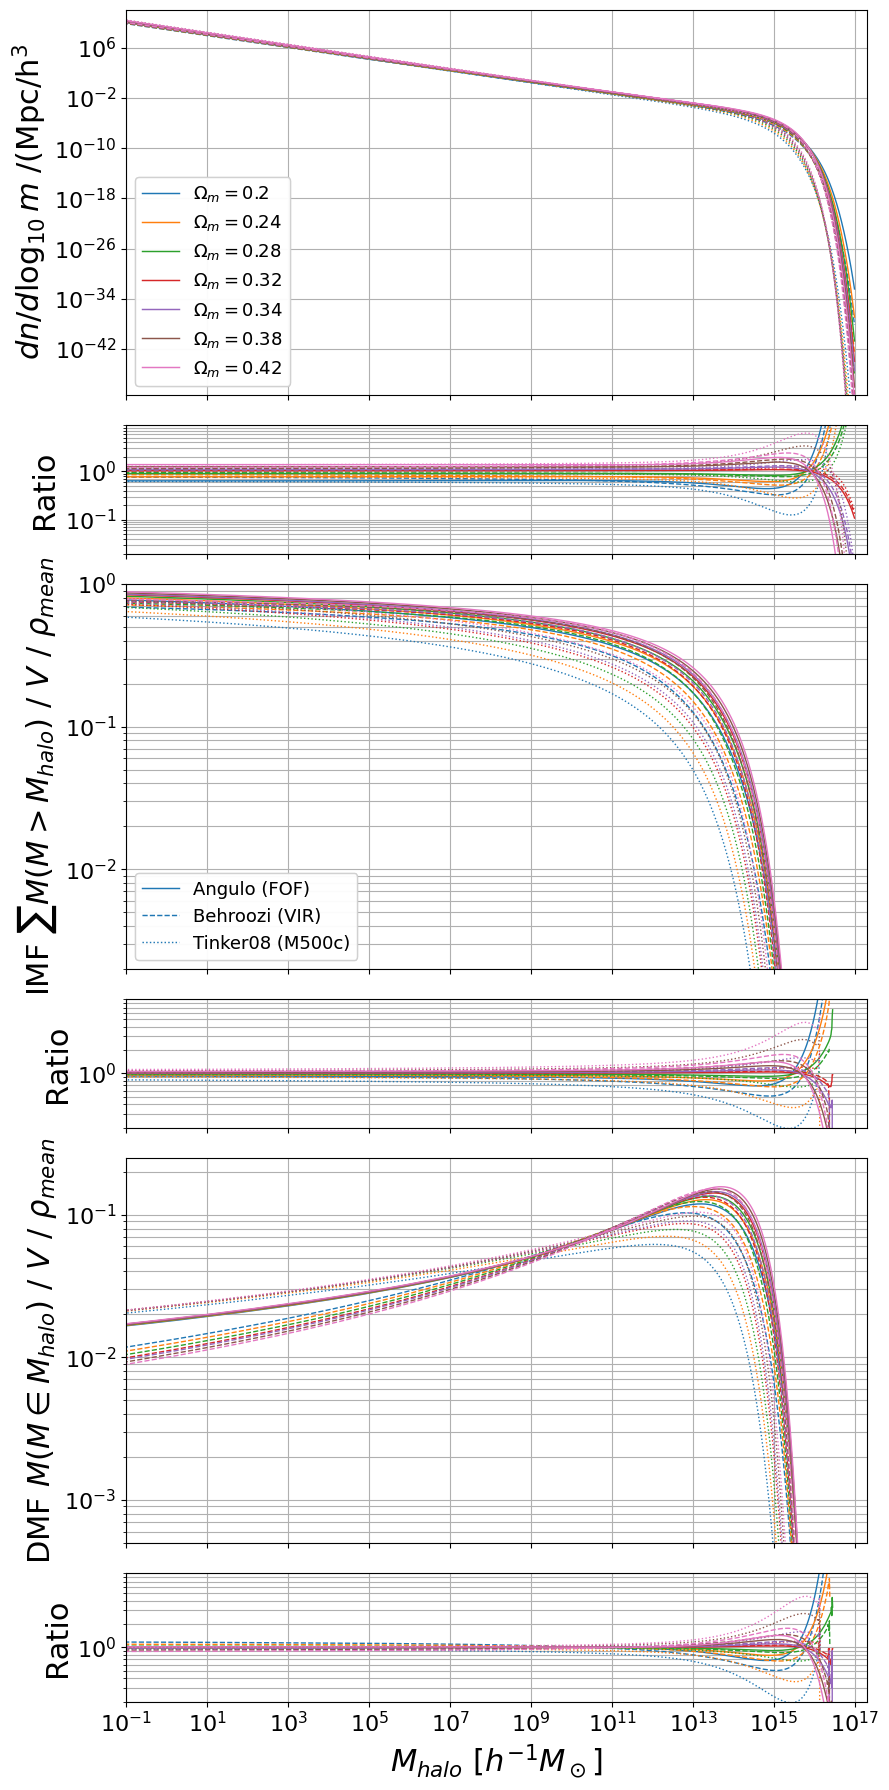

In [35]:
fig, axs = plt.subplots(6, 1, figsize=(9, 18),  sharey='row', sharex='col', gridspec_kw={'height_ratios': [3, 1, 3, 1, 3, 1]})
md=cal_mean_dens(ad_def['cosmo'])

for j in om0:
    s8=str(j)
    mdc=cal_mean_dens(ad_om0[s8]['cosmo'])
    for i, hn in enumerate(['HMFlog', 'IMF', 'DMF']):
        if i == 0:
            nm1=1; nm2=1
        else:
            nm1=md; nm2=mdc
            
        p=axs[i*2].loglog(ad_om0[s8][hn]['X'], ad_om0[s8][hn]['FOF']['Angulo']/nm2, ls='-', lw=1)
        axs[i*2+1].plot(ad_om0[s8][hn]['X'], ad_om0[s8][hn]['FOF']['Angulo']/nm2/ad_def[hn]['FOF']['Angulo']*nm1,ls='-', lw=1,color=p[0].get_color())
        
        axs[i*2].loglog(ad_om0[s8][hn]['X'], ad_om0[s8][hn]['SOvir']['Behroozi']/nm2, ls='--', lw=1, color=p[0].get_color())
        axs[i*2+1].loglog(ad_om0[s8][hn]['X'], ad_om0[s8][hn]['SOvir']['Behroozi']/nm2/ad_def[hn]['SOvir']['Behroozi']*nm1,ls='--', lw=1,color=p[0].get_color())
    
        axs[i*2].loglog(ad_om0[s8][hn]['X'], ad_om0[s8][hn]['SO500c']['Tinker08']/nm2, ls=':', lw=1, color=p[0].get_color())
        axs[i*2+1].loglog(ad_om0[s8][hn]['X'], ad_om0[s8][hn]['SO500c']['Tinker08']/nm2/ad_def[hn]['SO500c']['Tinker08']*nm1,ls=':', lw=1,color=p[0].get_color())

lines = axs[0].get_lines()
legend2 = axs[0].legend([lines[i] for i in np.arange(0,3*len(om0),3)], [r'$\Omega_m = $'+str(i) for i in om0], fontsize=13)
axs[0].add_artist(legend2)

lines = axs[2].get_lines()
legend1 = axs[2].legend([lines[i] for i in [0,1,2]], ["Angulo (FOF)", "Behroozi (VIR)", "Tinker08 (M500c)"], fontsize=13)
axs[2].add_artist(legend1)

for axx in axs:
    axx.grid(which='both')
axs[0].set_ylim(5e-50,1e12)
axs[0].set_xlim(1e-1,2e17)
axs[2].set_ylim(2e-3,1)
axs[4].set_ylim(5e-4,0.25)
axs[1].set_ylim(2e-2,9)
axs[3].set_ylim(2e-1,9)
axs[5].set_ylim(2e-1,9)

# axs[0].set_ylabel(r"$dn/dm$ $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$",fontsize=22)
axs[0].set_ylabel(r"$dn/d\log_{10} m \ / ({\rm Mpc/h}^{3}$",fontsize=22)
axs[1].set_ylabel(r"Ratio",fontsize=22)
axs[2].set_ylabel(r"IMF $\sum M(M>M_{halo}) \ / \ V \ / \ \rho_{mean}$",fontsize=22)
axs[3].set_ylabel(r"Ratio",fontsize=22)
axs[4].set_ylabel(r"DMF $M (M \in M_{halo}) \ / \ V \ / \ \rho_{mean}$",fontsize=22)
axs[5].set_ylabel(r"Ratio",fontsize=22)
axs[5].set_xlabel(r"$M_{halo}\ [h^{-1}M_\odot]$",fontsize=22)

fig.tight_layout()
fig.savefig('om0_mfs.pdf',dpi=300)

## 3. Hubble parameter

In [39]:
# gather the data in a dictionary
if os.path.isfile('ad_hp0.ny'):
    ad_hp0=np.load('ad_hp0.npy',allow_pickle=True).item()
else:
    ad_hp0={}
    hp0=[100,90,80,70,60,50,40]
    mf_fof=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="Jenkins", lnk_min=-30, lnk_max=100, transfer_model='EH_BAO', cosmo_model=cosmology.cosmo.Planck15)
                        # transfer_model='CAMB',  transfer_params={"kmax": 500, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15)
    mf_vir=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="ST",  lnk_min=-30, lnk_max=100, transfer_model='EH_BAO', cosmo_model=cosmology.cosmo.Planck15)
                        # transfer_model='CAMB',  transfer_params={"kmax": 500, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15)
    mf_so=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="Watson", mdef_model  = "SOCritical", mdef_params = {"overdensity": 500}, lnk_min=-30, lnk_max=100,
                        transfer_model='EH_BAO', cosmo_model=cosmology.cosmo.Planck15)
                       # transfer_model='CAMB',  transfer_params={"kmax": 500, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15)
    for j in hp0:
        s8=str(j)
        ad_hp0[s8]={}
        ad_hp0[s8]['HMF']={}; ad_hp0[s8]['HMFlog']={}; ad_hp0[s8]['IMF']={}; ad_hp0[s8]['DMF']={}; 
        for i in ad_hp0[s8].keys():
            ad_hp0[s8][i]['FOF']={}; ad_hp0[s8][i]['SOvir']={}; ad_hp0[s8][i]['SO200c']={};ad_hp0[s8][i]['SO500c']={};

        mf_fof.update(cosmo_params={"H0":j})
        mf_vir.update(cosmo_params={"H0":j})
        mf_so.update(cosmo_params={"H0":j})
        ad_hp0[s8]['cosmo']=mf_so.cosmo
        for name, cls in allff:
            if isinstance(cls, type) and name not in ['_spline','SimDetails','FittingFunction','Mydouble']:
                if cls.get_measured_mdef() is None:
                    print('None:', name)
                    mf_ps=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="PS", lnk_min=-30, lnk_max=100,
                                        transfer_model='EH_BAO', cosmo_model=cosmology.cosmo.Planck15, cosmo_params={"H0":j})
                                       # transfer_model='CAMB', transfer_params={"kmax": km, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15,cosmo_params={"H0":j})
                    ad_hp0[s8]['HMF']['PS'] = mf_ps.dndm
                    ad_hp0[s8]['HMFlog']['PS'] = mf_ps.dndlog10m
                    ad_hp0[s8]['HMF']['X'] = ad_hp0[s8]['HMFlog']['X'] = mf_ps.m
                    
                    xi,mi,xf,mf=cal_integ_mass(mf_ps)
                    ad_hp0[s8]['IMF']['PS'] = mi
                    ad_hp0[s8]['IMF']['X'] = xi
                    ad_hp0[s8]['DMF']['PS'] = mf
                    ad_hp0[s8]['DMF']['X'] = xf
                    
                else:            
                    # print(name, cls.get_measured_mdef().colossus_name)
                    if cls.get_measured_mdef().colossus_name == 'fof':
                        mf_fof.update( hmf_model  = name,  mdef_params = {"linking_length": 0.2})
                        ad_hp0[s8]['HMF']['FOF'][name] = mf_fof.dndm
                        ad_hp0[s8]['HMFlog']['FOF'][name] = mf_fof.dndlog10m
                        if not np.array_equal(ad_hp0[s8]['HMF']['X'], mf_fof.m):
                            print('the axis is not same between HMF/X and FOF/'+name, ad_hp0[s8]['HMF']['X'], mf_fof.m)
                            
                        xi,mi,xf,mf=cal_integ_mass(mf_fof)
                        ad_hp0[s8]['IMF']['FOF'][name] = mi
                        if not np.array_equal(ad_hp0[s8]['IMF']['X'], xi):
                            print('the axis is not same between IMF/X and FOF/'+name)
                        ad_hp0[s8]['DMF']['FOF'][name] = mf
                        if not np.array_equal(ad_hp0[s8]['DMF']['X'], xf):
                            print('the axis is not same between DMF/X and FOF/'+name)
                    elif cls.get_measured_mdef().colossus_name == 'vir':
                        mf_vir.update( hmf_model  = name, mdef_params = {})
                        # print('VIR: name: ', name, ' x: ',mf_vir.m)
                        ad_hp0[s8]['HMF']['SOvir'][name] = mf_vir.dndm
                        ad_hp0[s8]['HMFlog']['SOvir'][name] = mf_vir.dndlog10m
                        if not np.array_equal(ad_hp0[s8]['HMF']['X'], mf_vir.m):
                            print('the axis is not same between HMF/X and SOvir/'+name, ad_hp0[s8]['HMF']['X'], mf_vir.m)
                            
                        xi,mi,xf,mf=cal_integ_mass(mf_vir)
                        ad_hp0[s8]['IMF']['SOvir'][name] = mi
                        if not np.array_equal(ad_hp0[s8]['IMF']['X'], xi):
                            print('the axis is not same between IMF/X and SOvir/'+name)
                        ad_hp0[s8]['DMF']['SOvir'][name] = mf
                        if not np.array_equal(ad_hp0[s8]['DMF']['X'], xf):
                            print('the axis is not same between DMF/X and SOvir/'+name)
        
                    elif cls.get_measured_mdef().colossus_name is None:
                        mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 200})
                        ad_hp0[s8]['HMF']['SO200c'][name] = mf_so.dndm
                        ad_hp0[s8]['HMFlog']['SO200c'][name] = mf_so.dndlog10m
                        if not np.array_equal(ad_hp0[s8]['HMF']['X'], mf_so.m):
                            print('the axis is not same between HMF/X and SO200c/'+name, ad_hp0[s8]['HMF']['X'], mf_so.m)
                            
                        xi,mi,xf,mf=cal_integ_mass(mf_so)
                        ad_hp0[s8]['IMF']['SO200c'][name] = mi
                        if not np.array_equal(ad_hp0[s8]['IMF']['X'], xi):
                            print('the axis is not same between IMF/X and SO200c/'+name)
                        ad_hp0[s8]['DMF']['SO200c'][name] = mf
                        if not np.array_equal(ad_hp0[s8]['DMF']['X'], xf):
                            print('the axis is not same between DMF/X and SO200c/'+name)
                            
                        mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 500})
                        ad_hp0[s8]['HMF']['SO500c'][name] = mf_so.dndm
                        ad_hp0[s8]['HMFlog']['SO500c'][name] = mf_so.dndlog10m
                        if not np.array_equal(ad_hp0[s8]['HMF']['X'], mf_so.m):
                            print('the axis is not same between HMF/X and SO500c/'+name, ad_hp0[s8]['HMF']['X'], mf_so.m)
                            
                        xi,mi,xf,mf=cal_integ_mass(mf_so)
                        ad_hp0[s8]['IMF']['SO500c'][name] = mi
                        if not np.array_equal(ad_hp0[s8]['IMF']['X'], xi):
                            print('the axis is not same between IMF/X and SO500c/'+name)
                        ad_hp0[s8]['DMF']['SO500c'][name] = mf
                        if not np.array_equal(ad_hp0[s8]['DMF']['X'], xf):
                            print('the axis is not same between DMF/X and SO500c/'+name)
                    else:
                        if '200m' in name:
                            continue
        
                        if '200c' in name:
                            mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 200})
                            ad_hp0[s8]['HMF']['SO200c'][name] = mf_so.dndm
                            ad_hp0[s8]['HMFlog']['SO200c'][name] = mf_so.dndlog10m
                            if not np.array_equal(ad_hp0[s8]['HMF']['X'], mf_so.m):
                                print('the axis is not same between HMF/X and SO200c/'+name, ad_hp0[s8]['HMF']['X'], mf_so.m)
                                
                            xi,mi,xf,mf=cal_integ_mass(mf_so)
                            ad_hp0[s8]['IMF']['SO200c'][name] = mi
                            if not np.array_equal(ad_hp0[s8]['IMF']['X'], xi):
                                print('the axis is not same between IMF/X and SO200c/'+name)
                            ad_hp0[s8]['DMF']['SO200c'][name] = mf
                            if not np.array_equal(ad_hp0[s8]['DMF']['X'], xf):
                                print('the axis is not same between DMF/X and SO200c/'+name)
                        else:
                            mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 500})
                            ad_hp0[s8]['HMF']['SO500c'][name] = mf_so.dndm
                            ad_hp0[s8]['HMFlog']['SO500c'][name] = mf_so.dndlog10m
                            if not np.array_equal(ad_hp0[s8]['HMF']['X'], mf_so.m):
                                print('the axis is not same between HMF/X and SO500c/'+name, ad_hp0[s8]['HMF']['X'], mf_so.m)
                                
                            xi,mi,xf,mf=cal_integ_mass(mf_so)
                            ad_hp0[s8]['IMF']['SO500c'][name] = mi
                            if not np.array_equal(ad_hp0[s8]['IMF']['X'], xi):
                                print('the axis is not same between IMF/X and SO500c/'+name)
                            ad_hp0[s8]['DMF']['SO500c'][name] = mf
                            if not np.array_equal(ad_hp0[s8]['DMF']['X'], xf):
                                print('the axis is not same between DMF/X and SO500c/'+name)
    np.save('ad_hp0',ad_hp0)

None: PS
None: PS
None: PS
None: PS
None: PS
None: PS
None: PS


In [ ]:
mf_fof=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="Jenkins", lnk_min=-30, lnk_max=100,
                        transfer_model='CAMB',  transfer_params={"kmax": 300, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15)
mf_fof.update(cosmo_params={"H0":40})

/tmp/ipykernel_5765/2340725944.py:14: RuntimeWarning: invalid value encountered in divide
  axs[i*2+1].plot(ad_hp0[s8][hn]['X'], ad_hp0[s8][hn]['FOF']['Angulo']/nm2/ad_def[hn]['FOF']['Angulo']*nm1,ls='-', lw=1,color=p[0].get_color())
/tmp/ipykernel_5765/2340725944.py:17: RuntimeWarning: invalid value encountered in divide
  axs[i*2+1].loglog(ad_hp0[s8][hn]['X'], ad_hp0[s8][hn]['SOvir']['Behroozi']/nm2/ad_def[hn]['SOvir']['Behroozi']*nm1,ls='--', lw=1,color=p[0].get_color())
/tmp/ipykernel_5765/2340725944.py:20: RuntimeWarning: invalid value encountered in divide
  axs[i*2+1].loglog(ad_hp0[s8][hn]['X'], ad_hp0[s8][hn]['SO500c']['Tinker08']/nm2/ad_def[hn]['SO500c']['Tinker08']*nm1,ls=':', lw=1,color=p[0].get_color())
/tmp/ipykernel_5765/2340725944.py:14: RuntimeWarning: divide by zero encountered in divide
  axs[i*2+1].plot(ad_hp0[s8][hn]['X'], ad_hp0[s8][hn]['FOF']['Angulo']/nm2/ad_def[hn]['FOF']['Angulo']*nm1,ls='-', lw=1,color=p[0].get_color())
/tmp/ipykernel_5765/2340725944.py:17: Ru

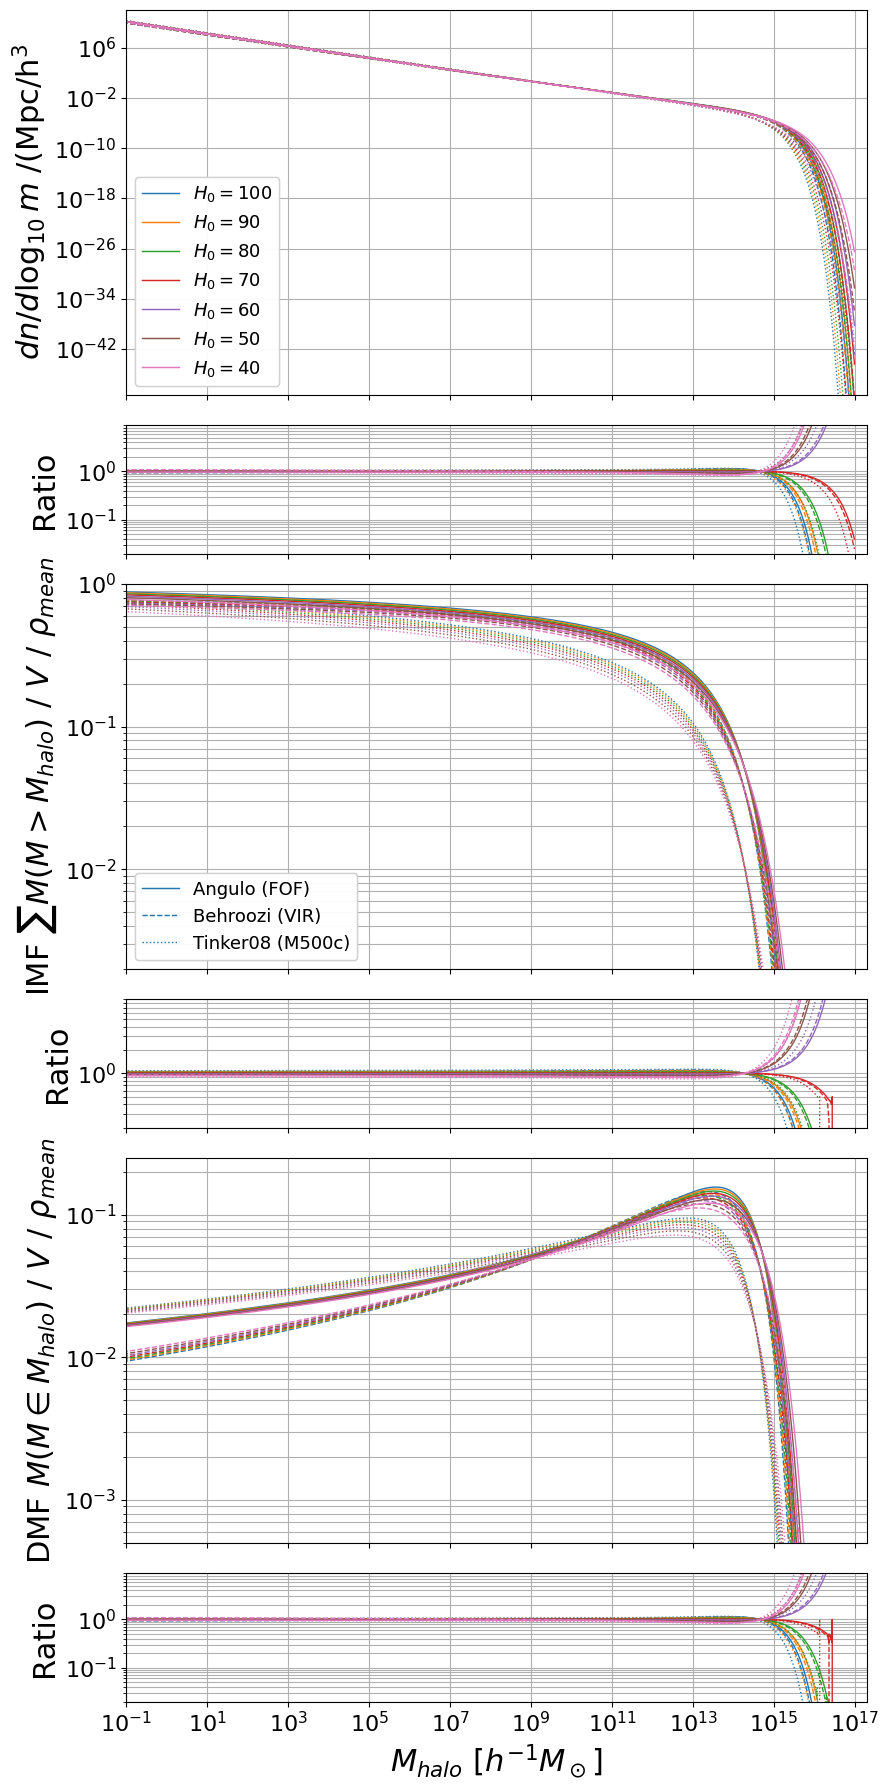

In [40]:
fig, axs = plt.subplots(6, 1, figsize=(9, 18),  sharey='row', sharex='col', gridspec_kw={'height_ratios': [3, 1, 3, 1, 3, 1]})
md=cal_mean_dens(ad_def['cosmo'])

for j in hp0:
    s8=str(j)
    mdc=cal_mean_dens(ad_hp0[s8]['cosmo'])
    for i, hn in enumerate(['HMFlog', 'IMF', 'DMF']):
        if i == 0:
            nm1=1; nm2=1
        else:
            nm1=md; nm2=mdc
            
        p=axs[i*2].loglog(ad_hp0[s8][hn]['X'], ad_hp0[s8][hn]['FOF']['Angulo']/nm2, ls='-', lw=1)
        axs[i*2+1].plot(ad_hp0[s8][hn]['X'], ad_hp0[s8][hn]['FOF']['Angulo']/nm2/ad_def[hn]['FOF']['Angulo']*nm1,ls='-', lw=1,color=p[0].get_color())
        
        axs[i*2].loglog(ad_hp0[s8][hn]['X'], ad_hp0[s8][hn]['SOvir']['Behroozi']/nm2, ls='--', lw=1, color=p[0].get_color())
        axs[i*2+1].loglog(ad_hp0[s8][hn]['X'], ad_hp0[s8][hn]['SOvir']['Behroozi']/nm2/ad_def[hn]['SOvir']['Behroozi']*nm1,ls='--', lw=1,color=p[0].get_color())
    
        axs[i*2].loglog(ad_hp0[s8][hn]['X'], ad_hp0[s8][hn]['SO500c']['Tinker08']/nm2, ls=':', lw=1, color=p[0].get_color())
        axs[i*2+1].loglog(ad_hp0[s8][hn]['X'], ad_hp0[s8][hn]['SO500c']['Tinker08']/nm2/ad_def[hn]['SO500c']['Tinker08']*nm1,ls=':', lw=1,color=p[0].get_color())

lines = axs[0].get_lines()
legend2 = axs[0].legend([lines[i] for i in np.arange(0,3*len(hp0),3)], [r'$H_0 = $'+str(i) for i in hp0], fontsize=13)
axs[0].add_artist(legend2)

lines = axs[2].get_lines()
legend1 = axs[2].legend([lines[i] for i in [0,1,2]], ["Angulo (FOF)", "Behroozi (VIR)", "Tinker08 (M500c)"], fontsize=13)
axs[2].add_artist(legend1)

for axx in axs:
    axx.grid(which='both')
axs[0].set_ylim(5e-50,1e12)
axs[0].set_xlim(1e-1,2e17)
axs[2].set_ylim(2e-3,1)
axs[4].set_ylim(5e-4,0.25)
axs[1].set_ylim(2e-2,9)
axs[3].set_ylim(2e-1,9)
axs[5].set_ylim(2e-2,9)

# axs[0].set_ylabel(r"$dn/dm$ $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$",fontsize=22)
axs[0].set_ylabel(r"$dn/d\log_{10} m \ / ({\rm Mpc/h}^{3}$",fontsize=22)
axs[1].set_ylabel(r"Ratio",fontsize=22)
axs[2].set_ylabel(r"IMF $\sum M(M>M_{halo}) \ / \ V \ / \ \rho_{mean}$",fontsize=22)
axs[3].set_ylabel(r"Ratio",fontsize=22)
axs[4].set_ylabel(r"DMF $M (M \in M_{halo}) \ / \ V \ / \ \rho_{mean}$",fontsize=22)
axs[5].set_ylabel(r"Ratio",fontsize=22)
axs[5].set_xlabel(r"$M_{halo}\ [h^{-1}M_\odot]$",fontsize=22)

fig.tight_layout()
fig.savefig('hp0_mfs.pdf',dpi=300)

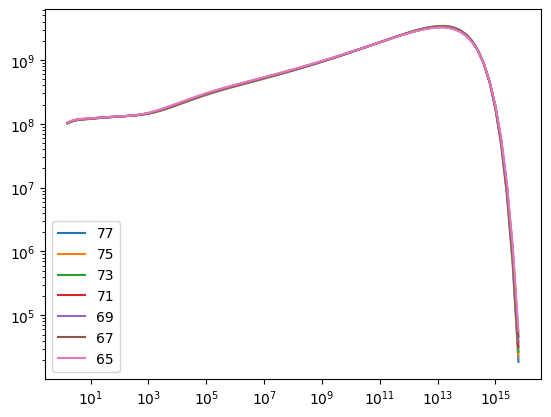

In [275]:
for j in hp0:
    s8=str(j)
    plt.loglog(ad_hp0[s8]['DMF']['X'], ad_hp0[s8]['DMF']['PS'], label=s8)
plt.legend()

## 4. Spectral index 

In [42]:
# gather the data in a dictionary
if os.path.isfile('ad_sin.ny'):
    ad_sin=np.load('ad_sin.npy',allow_pickle=True).item()
else:
    
    ad_sin={}
    sin8=[0.8,0.85,0.9,0.95,1.0,1.05,1.1]
    mf_fof=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="Jenkins", lnk_min=-30, lnk_max=100,  transfer_model='EH_BAO', cosmo_model=cosmology.cosmo.Planck15)
                        # transfer_model='CAMB',  transfer_params={"kmax": 500, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15)
    mf_vir=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="ST", lnk_min=-30, lnk_max=100, transfer_model='EH_BAO', cosmo_model=cosmology.cosmo.Planck15)
                        # transfer_model='CAMB',  transfer_params={"kmax": 500, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15)
    mf_so=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="Watson", mdef_model  = "SOCritical", mdef_params = {"overdensity": 500}, lnk_min=-30, lnk_max=100,
                        transfer_model='EH_BAO', cosmo_model=cosmology.cosmo.Planck15)
                       # transfer_model='CAMB',  transfer_params={"kmax": 500, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15)
    for j in sin8:
        s8=str(j)
        ad_sin[s8]={}
        ad_sin[s8]['HMF']={}; ad_sin[s8]['HMFlog']={}; ad_sin[s8]['IMF']={}; ad_sin[s8]['DMF']={}; 
        for i in ad_sin[s8].keys():
            ad_sin[s8][i]['FOF']={}; ad_sin[s8][i]['SOvir']={}; ad_sin[s8][i]['SO200c']={};ad_sin[s8][i]['SO500c']={};

        mf_fof.update(n=j)
        mf_vir.update(n=j)
        mf_so.update(n=j)
        ad_sin[s8]['cosmo']=mf_so.cosmo
        for name, cls in allff:
            if isinstance(cls, type) and name not in ['_spline','SimDetails','FittingFunction','Mydouble']:
                if cls.get_measured_mdef() is None:
                    print('None:', name)
                    mf_ps=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="PS", lnk_min=-30, lnk_max=100,
                                       transfer_model='EH_BAO', cosmo_model=cosmology.cosmo.Planck15, n=j)
                                       # transfer_model='CAMB',  transfer_params={"kmax": 500, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15,n=j)
                    ad_sin[s8]['HMF']['PS'] = mf_ps.dndm
                    ad_sin[s8]['HMFlog']['PS'] = mf_ps.dndlog10m
                    ad_sin[s8]['HMF']['X'] = ad_sin[s8]['HMFlog']['X'] = mf_ps.m
                    
                    xi,mi,xf,mf=cal_integ_mass(mf_ps)
                    ad_sin[s8]['IMF']['PS'] = mi
                    ad_sin[s8]['IMF']['X'] = xi
                    ad_sin[s8]['DMF']['PS'] = mf
                    ad_sin[s8]['DMF']['X'] = xf
                    
                else:            
                    # print(name, cls.get_measured_mdef().colossus_name)
                    if cls.get_measured_mdef().colossus_name == 'fof':
                        mf_fof.update( hmf_model  = name, mdef_params = {"linking_length": 0.2})
                        ad_sin[s8]['HMF']['FOF'][name] = mf_fof.dndm
                        ad_sin[s8]['HMFlog']['FOF'][name] = mf_fof.dndlog10m
                        if not np.array_equal(ad_sin[s8]['HMF']['X'], mf_fof.m):
                            print('the axis is not same between HMF/X and FOF/'+name, ad_sin[s8]['HMF']['X'], mf_fof.m)
                            
                        xi,mi,xf,mf=cal_integ_mass(mf_fof)
                        ad_sin[s8]['IMF']['FOF'][name] = mi
                        if not np.array_equal(ad_sin[s8]['IMF']['X'], xi):
                            print('the axis is not same between IMF/X and FOF/'+name)
                        ad_sin[s8]['DMF']['FOF'][name] = mf
                        if not np.array_equal(ad_sin[s8]['DMF']['X'], xf):
                            print('the axis is not same between DMF/X and FOF/'+name)
                    elif cls.get_measured_mdef().colossus_name == 'vir':
                        mf_vir.update( hmf_model  = name, mdef_params = {})
                        # print('VIR: name: ', name, ' x: ',mf_vir.m)
                        ad_sin[s8]['HMF']['SOvir'][name] = mf_vir.dndm
                        ad_sin[s8]['HMFlog']['SOvir'][name] = mf_vir.dndlog10m
                        if not np.array_equal(ad_sin[s8]['HMF']['X'], mf_vir.m):
                            print('the axis is not same between HMF/X and SOvir/'+name, ad_sin[s8]['HMF']['X'], mf_vir.m)
                            
                        xi,mi,xf,mf=cal_integ_mass(mf_vir)
                        ad_sin[s8]['IMF']['SOvir'][name] = mi
                        if not np.array_equal(ad_sin[s8]['IMF']['X'], xi):
                            print('the axis is not same between IMF/X and SOvir/'+name)
                        ad_sin[s8]['DMF']['SOvir'][name] = mf
                        if not np.array_equal(ad_sin[s8]['DMF']['X'], xf):
                            print('the axis is not same between DMF/X and SOvir/'+name)
        
                    elif cls.get_measured_mdef().colossus_name is None:
                        mf_so.update( hmf_model  = name,  mdef_params = {"overdensity": 200})
                        ad_sin[s8]['HMF']['SO200c'][name] = mf_so.dndm
                        ad_sin[s8]['HMF']['SO200c'][name] = mf_so.dndlog10m
                        if not np.array_equal(ad_sin[s8]['HMF']['X'], mf_so.m):
                            print('the axis is not same between HMF/X and SO200c/'+name, ad_sin[s8]['HMF']['X'], mf_so.m)
                            
                        xi,mi,xf,mf=cal_integ_mass(mf_so)
                        ad_sin[s8]['IMF']['SO200c'][name] = mi
                        if not np.array_equal(ad_sin[s8]['IMF']['X'], xi):
                            print('the axis is not same between IMF/X and SO200c/'+name)
                        ad_sin[s8]['DMF']['SO200c'][name] = mf
                        if not np.array_equal(ad_sin[s8]['DMF']['X'], xf):
                            print('the axis is not same between DMF/X and SO200c/'+name)
                            
                        mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 500})
                        ad_sin[s8]['HMF']['SO500c'][name] = mf_so.dndm
                        ad_sin[s8]['HMFlog']['SO500c'][name] = mf_so.dndlog10m
                        if not np.array_equal(ad_sin[s8]['HMF']['X'], mf_so.m):
                            print('the axis is not same between HMF/X and SO500c/'+name, ad_sin[s8]['HMF']['X'], mf_so.m)
                            
                        xi,mi,xf,mf=cal_integ_mass(mf_so)
                        ad_sin[s8]['IMF']['SO500c'][name] = mi
                        if not np.array_equal(ad_sin[s8]['IMF']['X'], xi):
                            print('the axis is not same between IMF/X and SO500c/'+name)
                        ad_sin[s8]['DMF']['SO500c'][name] = mf
                        if not np.array_equal(ad_sin[s8]['DMF']['X'], xf):
                            print('the axis is not same between DMF/X and SO500c/'+name)
                    else:
                        if '200m' in name:
                            continue
        
                        if '200c' in name:
                            mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 200})
                            ad_sin[s8]['HMF']['SO200c'][name] = mf_so.dndm
                            ad_sin[s8]['HMFlog']['SO200c'][name] = mf_so.dndlog10m
                            if not np.array_equal(ad_sin[s8]['HMF']['X'], mf_so.m):
                                print('the axis is not same between HMF/X and SO200c/'+name, ad_sin[s8]['HMF']['X'], mf_so.m)
                                
                            xi,mi,xf,mf=cal_integ_mass(mf_so)
                            ad_sin[s8]['IMF']['SO200c'][name] = mi
                            if not np.array_equal(ad_sin[s8]['IMF']['X'], xi):
                                print('the axis is not same between IMF/X and SO200c/'+name)
                            ad_sin[s8]['DMF']['SO200c'][name] = mf
                            if not np.array_equal(ad_sin[s8]['DMF']['X'], xf):
                                print('the axis is not same between DMF/X and SO200c/'+name)
                        else:
                            mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 500})
                            ad_sin[s8]['HMF']['SO500c'][name] = mf_so.dndm
                            ad_sin[s8]['HMFlog']['SO500c'][name] = mf_so.dndlog10m
                            if not np.array_equal(ad_sin[s8]['HMF']['X'], mf_so.m):
                                print('the axis is not same between HMF/X and SO500c/'+name, ad_sin[s8]['HMF']['X'], mf_so.m)
                                
                            xi,mi,xf,mf=cal_integ_mass(mf_so)
                            ad_sin[s8]['IMF']['SO500c'][name] = mi
                            if not np.array_equal(ad_sin[s8]['IMF']['X'], xi):
                                print('the axis is not same between IMF/X and SO500c/'+name)
                            ad_sin[s8]['DMF']['SO500c'][name] = mf
                            if not np.array_equal(ad_sin[s8]['DMF']['X'], xf):
                                print('the axis is not same between DMF/X and SO500c/'+name)
    np.save('ad_sin',ad_sin)

None: PS
None: PS
None: PS
None: PS
None: PS
None: PS
None: PS


In [45]:
name, cls

('Reed03', hmf.mass_function.fitting_functions.Reed03)

/tmp/ipykernel_5765/632894129.py:14: RuntimeWarning: divide by zero encountered in divide
  axs[i*2+1].plot(ad_sin[s8][hn]['X'], ad_sin[s8][hn]['FOF']['Angulo']/nm2/ad_def[hn]['FOF']['Angulo']*nm1,ls='-', lw=1,color=p[0].get_color())
/tmp/ipykernel_5765/632894129.py:14: RuntimeWarning: invalid value encountered in divide
  axs[i*2+1].plot(ad_sin[s8][hn]['X'], ad_sin[s8][hn]['FOF']['Angulo']/nm2/ad_def[hn]['FOF']['Angulo']*nm1,ls='-', lw=1,color=p[0].get_color())
/tmp/ipykernel_5765/632894129.py:17: RuntimeWarning: divide by zero encountered in divide
  axs[i*2+1].loglog(ad_sin[s8][hn]['X'], ad_sin[s8][hn]['SOvir']['Behroozi']/nm2/ad_def[hn]['SOvir']['Behroozi']*nm1,ls='--', lw=1,color=p[0].get_color())
/tmp/ipykernel_5765/632894129.py:17: RuntimeWarning: invalid value encountered in divide
  axs[i*2+1].loglog(ad_sin[s8][hn]['X'], ad_sin[s8][hn]['SOvir']['Behroozi']/nm2/ad_def[hn]['SOvir']['Behroozi']*nm1,ls='--', lw=1,color=p[0].get_color())
/tmp/ipykernel_5765/632894129.py:20: Runtime

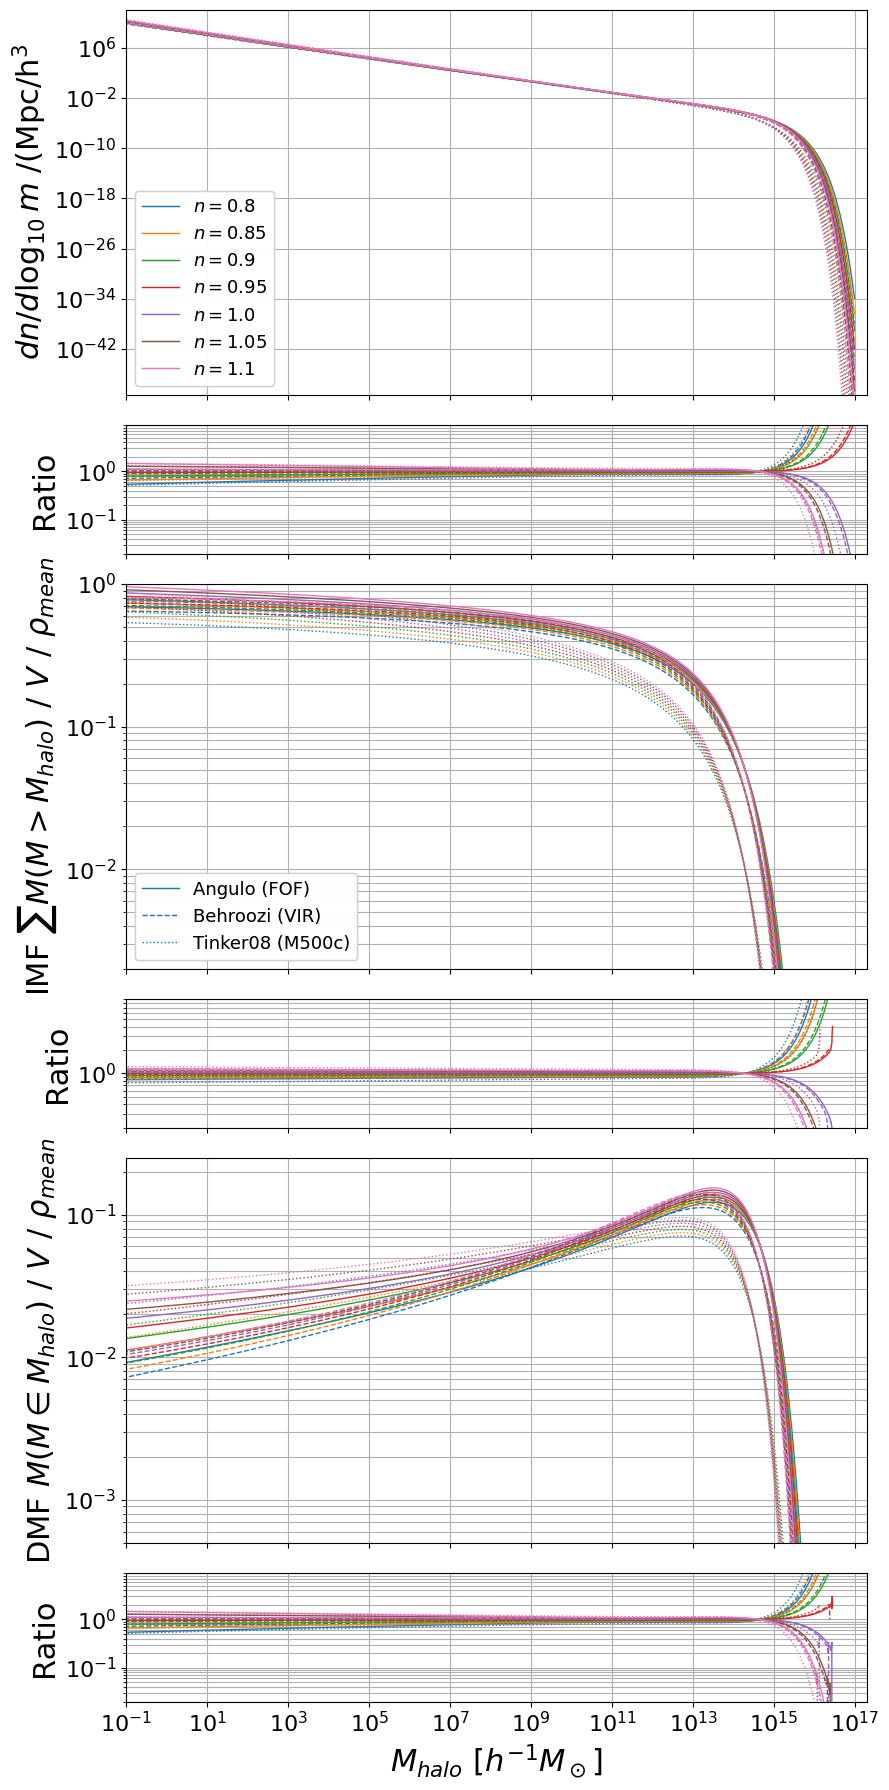

In [43]:
fig, axs = plt.subplots(6, 1, figsize=(9, 18),  sharey='row', sharex='col', gridspec_kw={'height_ratios': [3, 1, 3, 1, 3, 1]})
md=cal_mean_dens(ad_def['cosmo'])

for j in sin8:
    s8=str(j)
    mdc=cal_mean_dens(ad_sin[s8]['cosmo'])
    for i, hn in enumerate(['HMFlog', 'IMF', 'DMF']):
        if i == 0:
            nm1=1; nm2=1
        else:
            nm1=md; nm2=mdc
            
        p=axs[i*2].loglog(ad_sin[s8][hn]['X'], ad_sin[s8][hn]['FOF']['Angulo']/nm2, ls='-', lw=1)
        axs[i*2+1].plot(ad_sin[s8][hn]['X'], ad_sin[s8][hn]['FOF']['Angulo']/nm2/ad_def[hn]['FOF']['Angulo']*nm1,ls='-', lw=1,color=p[0].get_color())
        
        axs[i*2].loglog(ad_sin[s8][hn]['X'], ad_sin[s8][hn]['SOvir']['Behroozi']/nm2, ls='--', lw=1, color=p[0].get_color())
        axs[i*2+1].loglog(ad_sin[s8][hn]['X'], ad_sin[s8][hn]['SOvir']['Behroozi']/nm2/ad_def[hn]['SOvir']['Behroozi']*nm1,ls='--', lw=1,color=p[0].get_color())
    
        axs[i*2].loglog(ad_sin[s8][hn]['X'], ad_sin[s8][hn]['SO500c']['Tinker08']/nm2, ls=':', lw=1, color=p[0].get_color())
        axs[i*2+1].loglog(ad_sin[s8][hn]['X'], ad_sin[s8][hn]['SO500c']['Tinker08']/nm2/ad_def[hn]['SO500c']['Tinker08']*nm1,ls=':', lw=1,color=p[0].get_color())

lines = axs[0].get_lines()
legend2 = axs[0].legend([lines[i] for i in np.arange(0,3*len(sin8),3)], [r'$n = $'+str(i) for i in sin8], fontsize=13)
axs[0].add_artist(legend2)

lines = axs[2].get_lines()
legend1 = axs[2].legend([lines[i] for i in [0,1,2]], ["Angulo (FOF)", "Behroozi (VIR)", "Tinker08 (M500c)"], fontsize=13)
axs[2].add_artist(legend1)

for axx in axs:
    axx.grid(which='both')
axs[0].set_ylim(5e-50,1e12)
axs[0].set_xlim(1e-1,2e17)
axs[2].set_ylim(2e-3,1)
axs[4].set_ylim(5e-4,0.25)
axs[1].set_ylim(2e-2,9)
axs[3].set_ylim(2e-1,9)
axs[5].set_ylim(2e-2,9)

# axs[0].set_ylabel(r"$dn/dm$ $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$",fontsize=22)
axs[0].set_ylabel(r"$dn/d\log_{10} m \ / ({\rm Mpc/h}^{3}$",fontsize=22)
axs[1].set_ylabel(r"Ratio",fontsize=22)
axs[2].set_ylabel(r"IMF $\sum M(M>M_{halo}) \ / \ V \ / \ \rho_{mean}$",fontsize=22)
axs[3].set_ylabel(r"Ratio",fontsize=22)
axs[4].set_ylabel(r"DMF $M (M \in M_{halo}) \ / \ V \ / \ \rho_{mean}$",fontsize=22)
axs[5].set_ylabel(r"Ratio",fontsize=22)
axs[5].set_xlabel(r"$M_{halo}\ [h^{-1}M_\odot]$",fontsize=22)

fig.tight_layout()
fig.savefig('sin_mfs.pdf',dpi=300)

In [276]:
MassFunction.parameter_info(["cosmo_model","n"]) 

cosmo_model : instance of `astropy.cosmology.FLRW` subclass
    The basis for the cosmology -- see astropy documentation. Can be a custom
    subclass. Defaults to Planck15.

n : float
    Spectral index of fluctuations
    Must be greater than -3 and less than 4.

